In [1100]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(zoo)
library(rvest)
library(grid)
library(rworldmap)
library(mapproj)
library(countrycode)
library(cowplot)

## Data scraping

In [1101]:
webpage_10 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2010")
webpage_11 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2011")
webpage_12 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2012")
webpage_13 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2013")
webpage_14 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2014")
webpage_15 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2015")
webpage_16 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2016")
webpage_17 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2017")
webpage_18 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2018")
webpage_19 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2019")
webpage_20 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2020")
webpage_21 <- read_html("https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2021")

tbls <- html_nodes(webpage, "table")

In [1102]:
tbls_ls <- list()

In [1103]:
#2010
tbls_ls$Table10 <- webpage_10 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2010)

#2011
tbls_ls$Table11 <- webpage_11 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2011)

#2012
tbls_ls$Table12 <- webpage_12 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2012)

#2013
tbls_ls$Table13 <- webpage_13 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2013)

#2014
tbls_ls$Table14 <- webpage_14 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2014)

#2015
tbls_ls$Table15 <- webpage_15 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2015)

#2016
tbls_ls$Table16 <- webpage_16 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2016)

#2017
tbls_ls$Table17 <- webpage_17 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2017)

#2018
tbls_ls$Table18 <- webpage_18 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2018)

#2019
tbls_ls$Table19 <- webpage_19 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2019)

#2020
tbls_ls$Table20 <- webpage_20 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2020)

#2021
tbls_ls$Table21 <- webpage_21 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2021)

In [1104]:
# Make one long table
table_allyears <- rbind(tbls_ls$Table10, tbls_ls$Table11, tbls_ls$Table12, tbls_ls$Table13, 
                        tbls_ls$Table14, tbls_ls$Table15, tbls_ls$Table16, tbls_ls$Table17,
                        tbls_ls$Table18, tbls_ls$Table19, tbls_ls$Table20, tbls_ls$Table21
                       )

table_all <- table_allyears %>% 
    rename("CLI" = "Cost of Living Index",
           "RI" = "Rent Index",
           "CLRI" = "Cost of Living Plus Rent Index",
           "GrocI" = "Groceries Index",
           "RestI" = "Restaurant Price Index",
           "PP" = "Local Purchasing Power Index") %>%
    mutate(Country = ifelse(Country == "Kosovo (Disputed Territory)", "Kosovo", Country)) %>%
    mutate(Country = ifelse(Country == "Bosnia And Herzegovina", "Bosnia and Herz.", Country)) %>%
    mutate(Country = ifelse(Country == "North Macedonia", "Macedonia", Country)) %>%
    mutate(Country = ifelse(Country == "Czech Republic", "Czech Rep.", Country)) %>%
    mutate(Country = ifelse(Country == "Luxem", "Czech Rep.", Country)) 

table_all %>% head(3)
countries_table <- table_all %>% distinct(Country)
countries_table %>% head(2)

Country     CLI    RI    CLRI   GrocI  RestI  PP    Year
1 Norway      161.30 71.58 121.20 169.83 162.61 69.06 2010
2 Denmark     138.91 83.47 114.13 116.60 159.09 74.09 2010
3 Netherlands 123.64 61.66  95.94  78.44 114.49 68.55 2010

Country
1 Norway 
2 Denmark

# Europe analysis

In [1105]:
europeanUnion <- c("Austria","Belgium","Bulgaria","Croatia","Cyprus",
                   "Czech Republic","Denmark","Estonia","Finland","France",
                   "Germany","Greece","Hungary","Ireland","Italy","Latvia",
                   "Lithuania","Luxembourg","Malta","Netherlands","Norway", "Poland",
                   "Portugal","Romania","Slovakia","Slovenia","Spain",
                   "Sweden","United Kingdom")

In [1106]:
countries <- 
countries_table %>% 
    mutate("Continent" = ifelse(Country == "Kosovo", "Europe", 
                                countrycode(sourcevar = countries_table$Country,
                                            origin = "country.name",
                                            destination = "continent")))

## NOW we have a table with DISTINCT countries & their continent
countries %>% head(2)

Warning message in countrycode(sourcevar = countries_table$Country, origin = "country.name", :
“Some values were not matched unambiguously: Kosovo
”


Country Continent
1 Norway  Europe   
2 Denmark Europe

## Defining continent

In [1107]:
# We create a data frame with countries of a given continent
europe_countries <- countries %>% filter(Continent == "Europe") %>% distinct(Country)

# We turn that data into vector
vector_europe <- c(europe_countries$Country)
vector_europe
class(vector_europe)

[1] "Norway"           "Denmark"          "Netherlands"      "France"          
 [5] "Switzerland"      "Belgium"          "Ireland"          "Italy"           
 [9] "Finland"          "United Kingdom"   "Austria"          "Germany"         
[13] "Sweden"           "Spain"            "Portugal"         "Croatia"         
[17] "Greece"           "Slovenia"         "Czech Rep."       "Latvia"          
[21] "Hungary"          "Serbia"           "Montenegro"       "Albania"         
[25] "Bulgaria"         "Russia"           "Poland"           "Bosnia and Herz."
[29] "Lithuania"        "Romania"          "Belarus"          "Ukraine"         
[33] "Iceland"          "Malta"            "Slovakia"         "Estonia"         
[37] "Macedonia"        "Monaco"           "Moldova"          "Luxembourg"      
[41] "Kosovo"

[1] "character"

In [1108]:
worldMap <- getMap()

indEU <- which(worldMap$NAME%in%vector_europe)  ## DEFINE the continent table

# worldMap$NAME  # "names" of the built-in countries

In [1109]:
# Extract longitutde and latitude border's coordinates of member states of EU

europeCoords <- lapply(indEU, function(i){
  df <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  df$region =as.character(worldMap$NAME[i])
  colnames(df) <- list("long", "lat", "region")
  return(df)
})

europeCoords <- do.call("rbind", europeCoords)

In [1110]:
ds_clean %>% head(3)

Country     CLI   RI   CLRI  GrocI RestI PP    Year Continent
1 Afghanistan 24.24 4.03 14.58 17.70 17.38 28.20 2020 Asia     
2 Afghanistan 26.33 3.85 15.59 19.30 16.98 26.58 2021 Asia     
3 Albania     37.88 7.33 23.15 30.87 29.08 37.03 2018 Europe

In [1111]:
# Create a new and clean dataframe
ds_clean <- merge(x = table_all, y = countries, by = "Country", all = TRUE)

# Add column values
europeCoords$CLI <- ds_clean$CLI[match(europeCoords$region, ds_clean$Country)]
europeCoords$RI <- ds_clean$RI[match(europeCoords$region, ds_clean$Country)]
europeCoords$CLRI <- ds_clean$CLRI[match(europeCoords$region, ds_clean$Country)]
europeCoords$GrocI <- ds_clean$GrocI[match(europeCoords$region, ds_clean$Country)]
europeCoords$RestI <- ds_clean$RestI[match(europeCoords$region, ds_clean$Country)]
europeCoords$PP <- ds_clean$PP[match(europeCoords$region, ds_clean$Country)]

ds_clean %>% arrange(Year) %>% filter(Continent == "Europe") %>% head(2)
europeCoords %>% head(2)

Country CLI    RI   CLRI  GrocI RestI PP    Year Continent
1 Albania  60.48 13.2 39.35 51.28 52.31 27.41 2010 Europe   
2 Austria 107.28 59.6 85.97 96.41 87.46 89.59 2010 Europe

long     lat      region  CLI   RI   CLRI  GrocI RestI PP   
1 20.59025 41.85540 Albania 37.88 7.33 23.15 30.87 29.08 37.03
2 20.46318 41.51509 Albania 37.88 7.33 23.15 30.87 29.08 37.03

## Europe - Cost of living Index

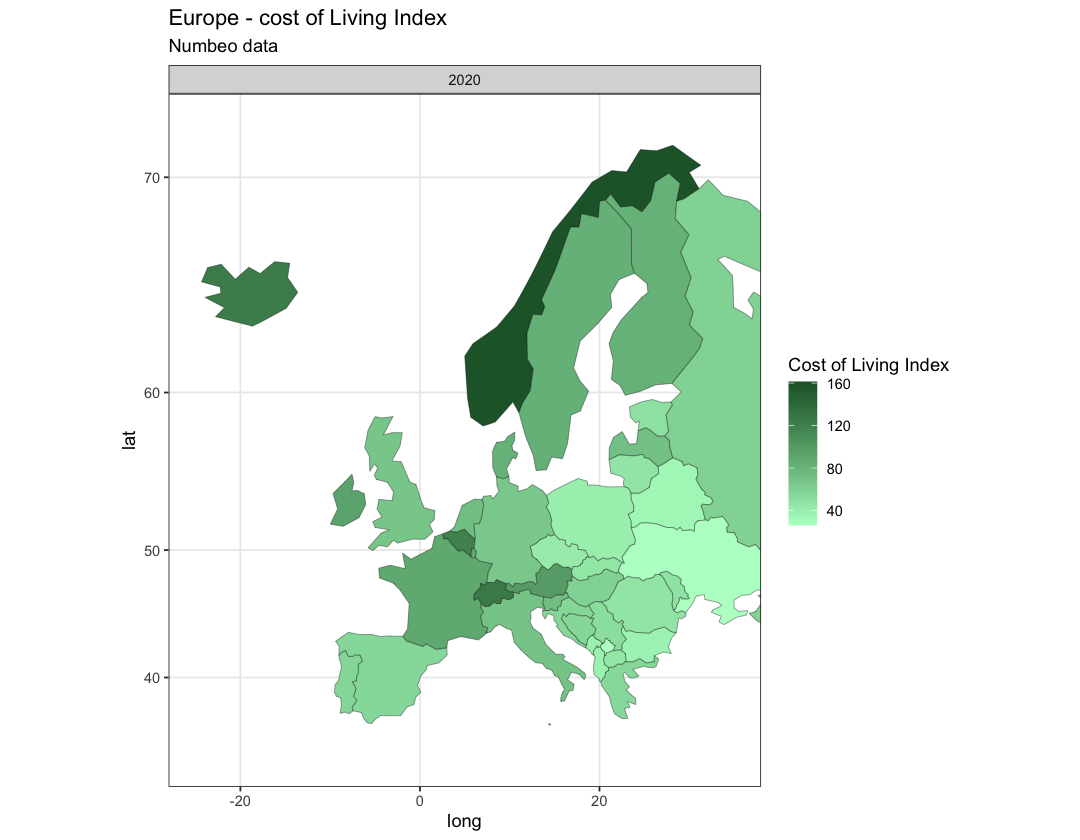

In [1118]:
# Plot the map
options(repr.plot.width=9, repr.plot.height=7)

ds_clean %>% filter(Year == 2020) %>%

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = CLI),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Cost of Living Index", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - cost of Living Index",
       subtitle = "Numbeo data") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

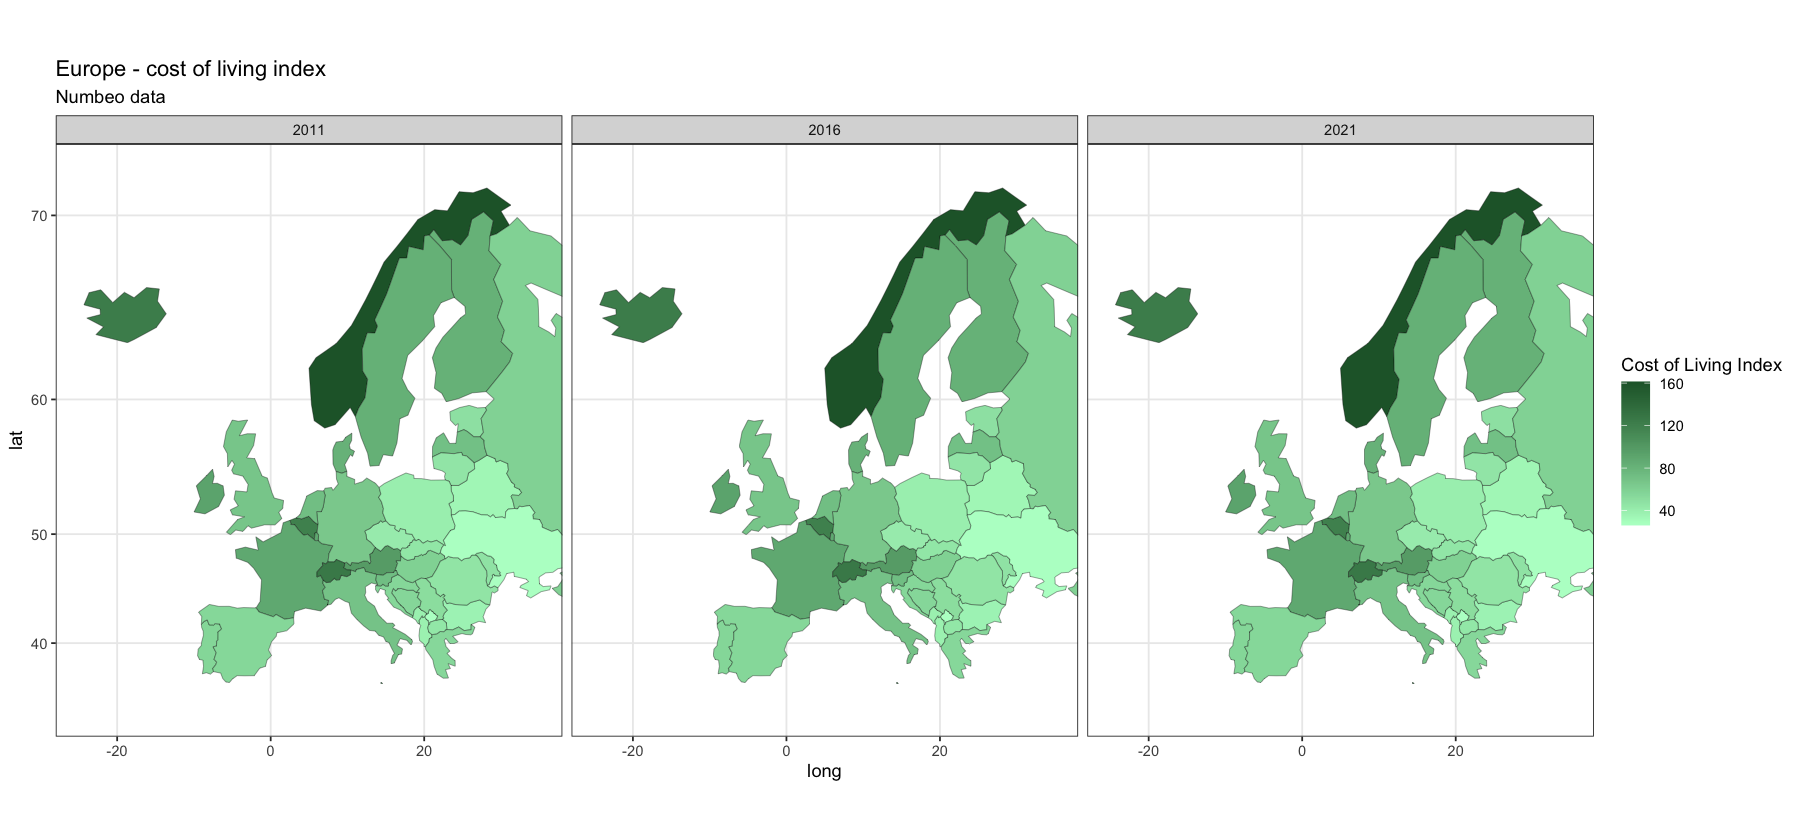

In [1119]:
# Plot the map
options(repr.plot.width=15, repr.plot.height=7)

ds_clean %>% filter(Year %in% c(2011, 2016, 2021)) %>%

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = CLI),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Cost of Living Index", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - cost of living index",
       subtitle = "Numbeo data") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               ) +

  theme_bw()

## Europe - Rent index

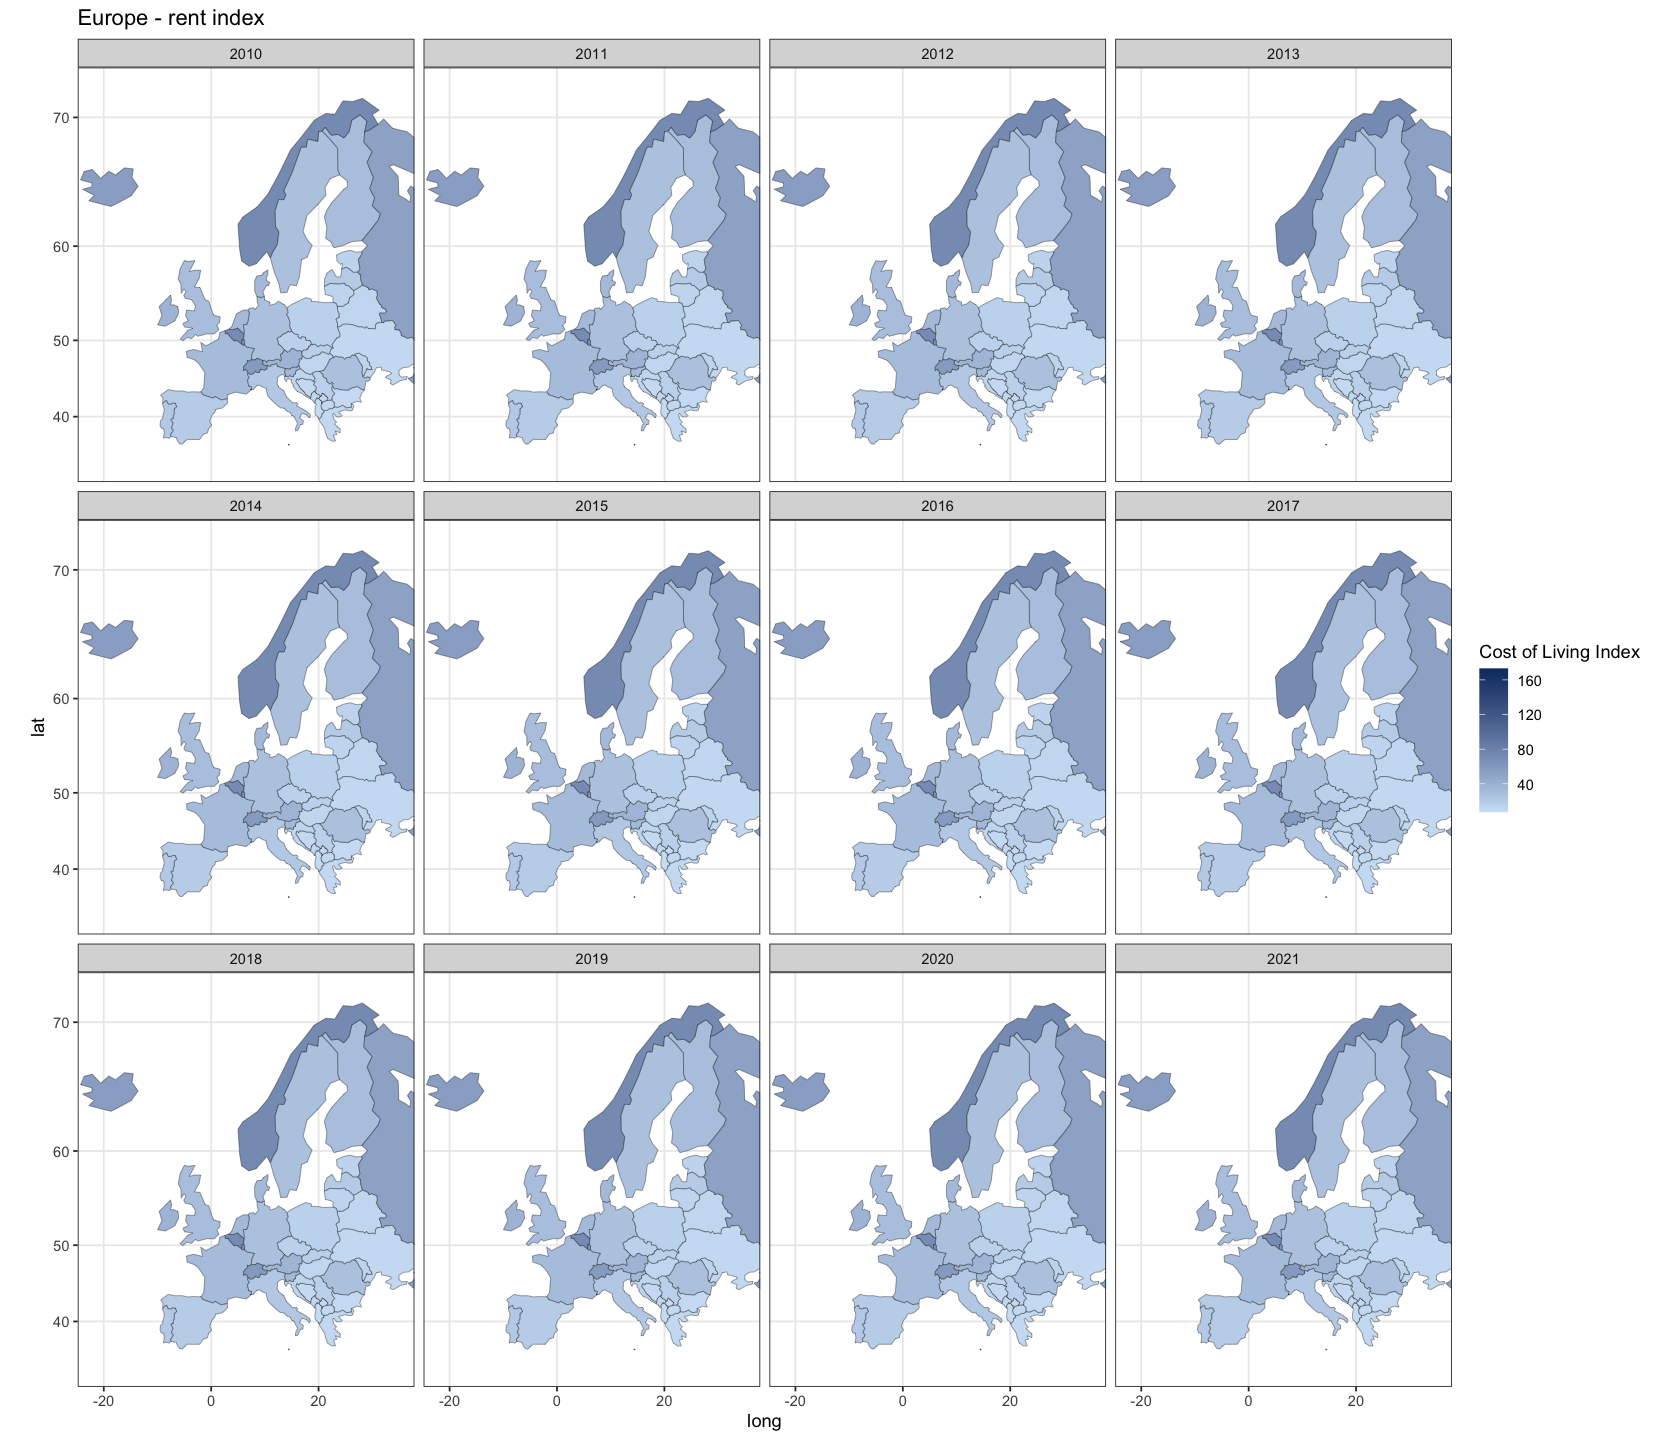

In [406]:
options(repr.plot.width=14, repr.plot.height=12)

ds_clean %>% 

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = RI),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-22, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Cost of Living Index", low = "#CFE2F5", high = "#073B6F", na.value = "white") +

  labs(title = "Europe - rent index") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

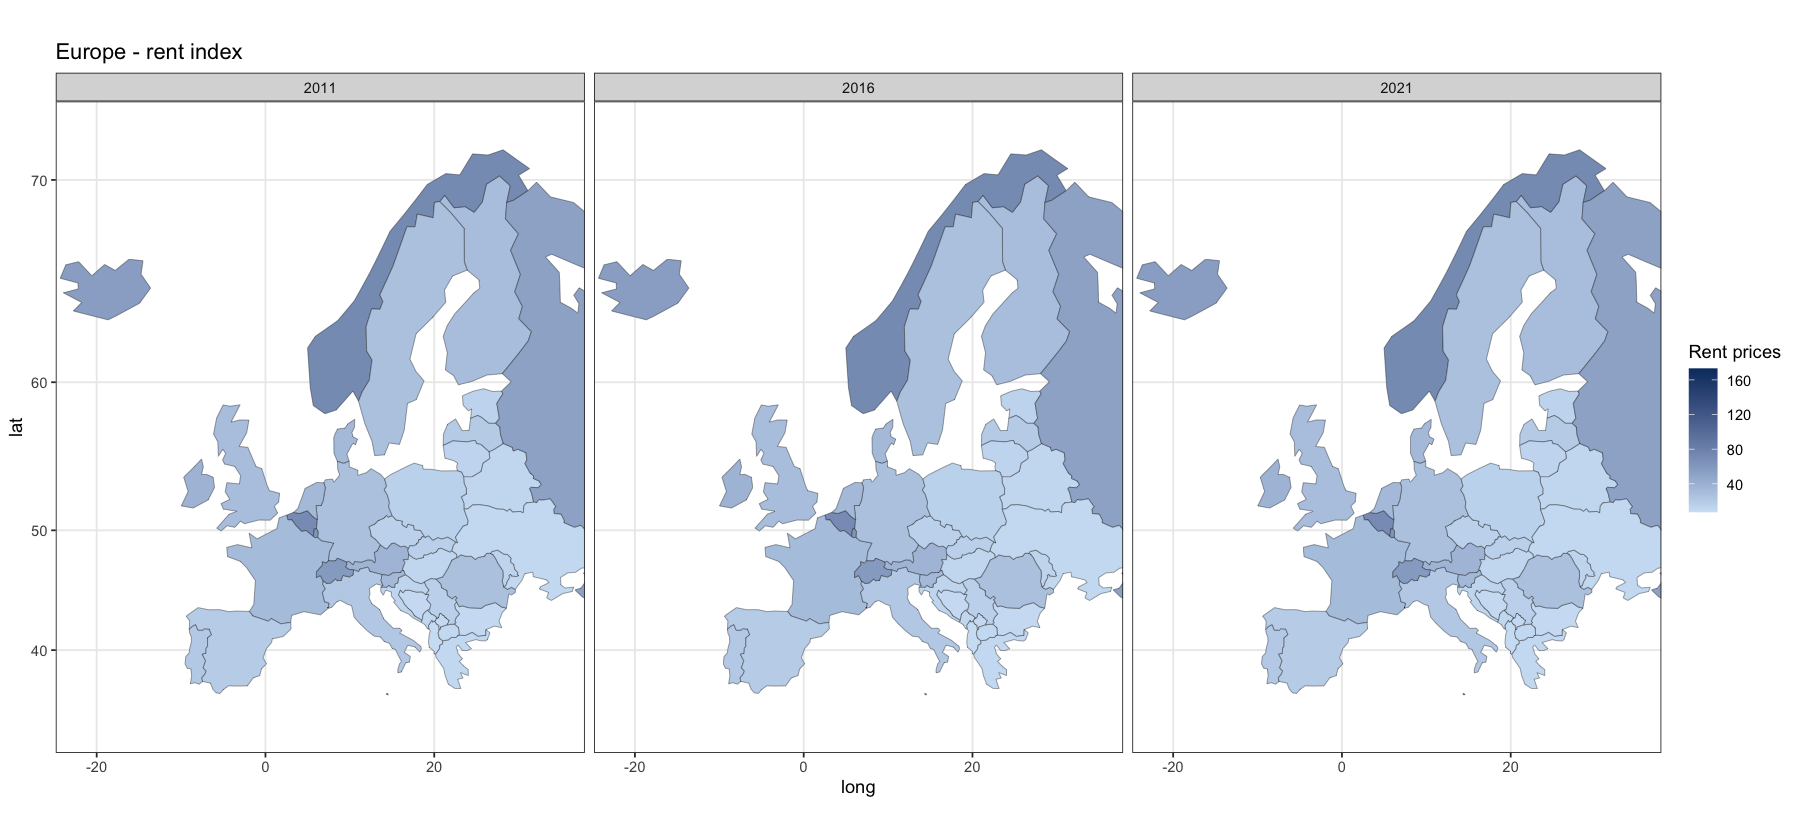

In [1114]:
options(repr.plot.width=15, repr.plot.height=7)

ds_clean %>% filter (Year %in% c(2011, 2016, 2021)) %>%

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = RI),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-22, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Rent prices", low = "#CFE2F5", high = "#073B6F", na.value = "white") +

  labs(title = "Europe - rent index") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               ) +

  theme_bw()

In [891]:
ds_clean %>% head(10)

Country     CLI   RI    CLRI  GrocI RestI PP    Year Continent
1  Afghanistan 24.24  4.03 14.58 17.70 17.38 28.20 2020 Asia     
2  Afghanistan 26.33  3.85 15.59 19.30 16.98 26.58 2021 Asia     
3  Albania     37.88  7.33 23.15 30.87 29.08 37.03 2018 Europe   
4  Albania     60.48 13.20 39.35 51.28 52.31 27.41 2010 Europe   
5  Albania     32.42  6.30 19.90 26.07 25.06 34.49 2017 Europe   
6  Albania     48.96 10.94 30.49 41.37 35.25 33.27 2014 Europe   
7  Albania     48.64 10.84 30.50 40.23 31.83 35.28 2013 Europe   
8  Albania     41.95  8.55 25.63 34.10 33.21 34.79 2015 Europe   
9  Albania     33.81  7.12 20.98 27.33 27.59 43.58 2016 Europe   
10 Albania     36.17  8.21 22.74 28.59 29.34 33.81 2019 Europe

## Europe - Cost of living and rent

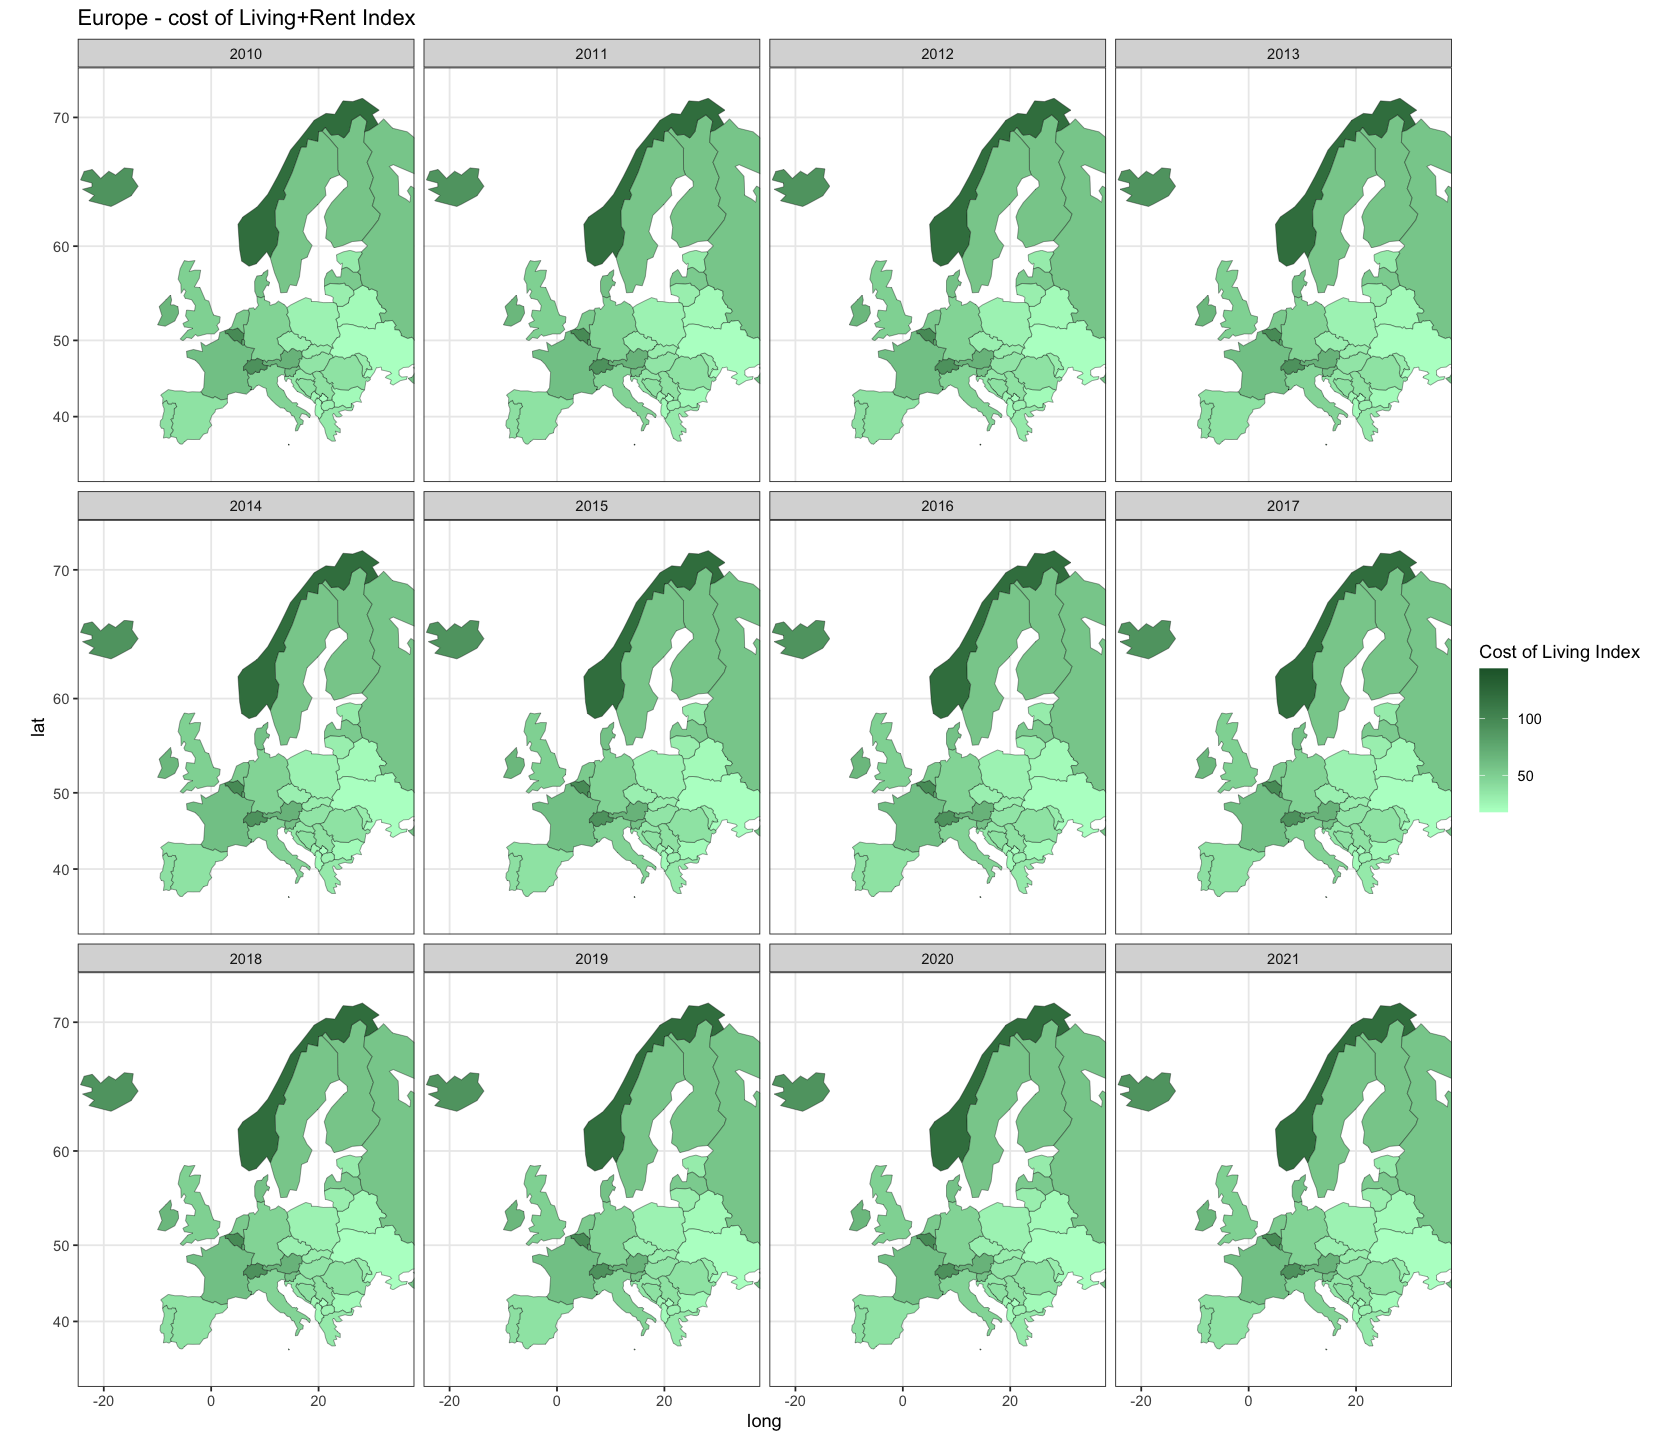

In [404]:
# Plot the map
options(repr.plot.width=14, repr.plot.height=12)

ds_clean %>% 

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = CLRI),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-22, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Cost of Living Index", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - cost of Living+Rent Index") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

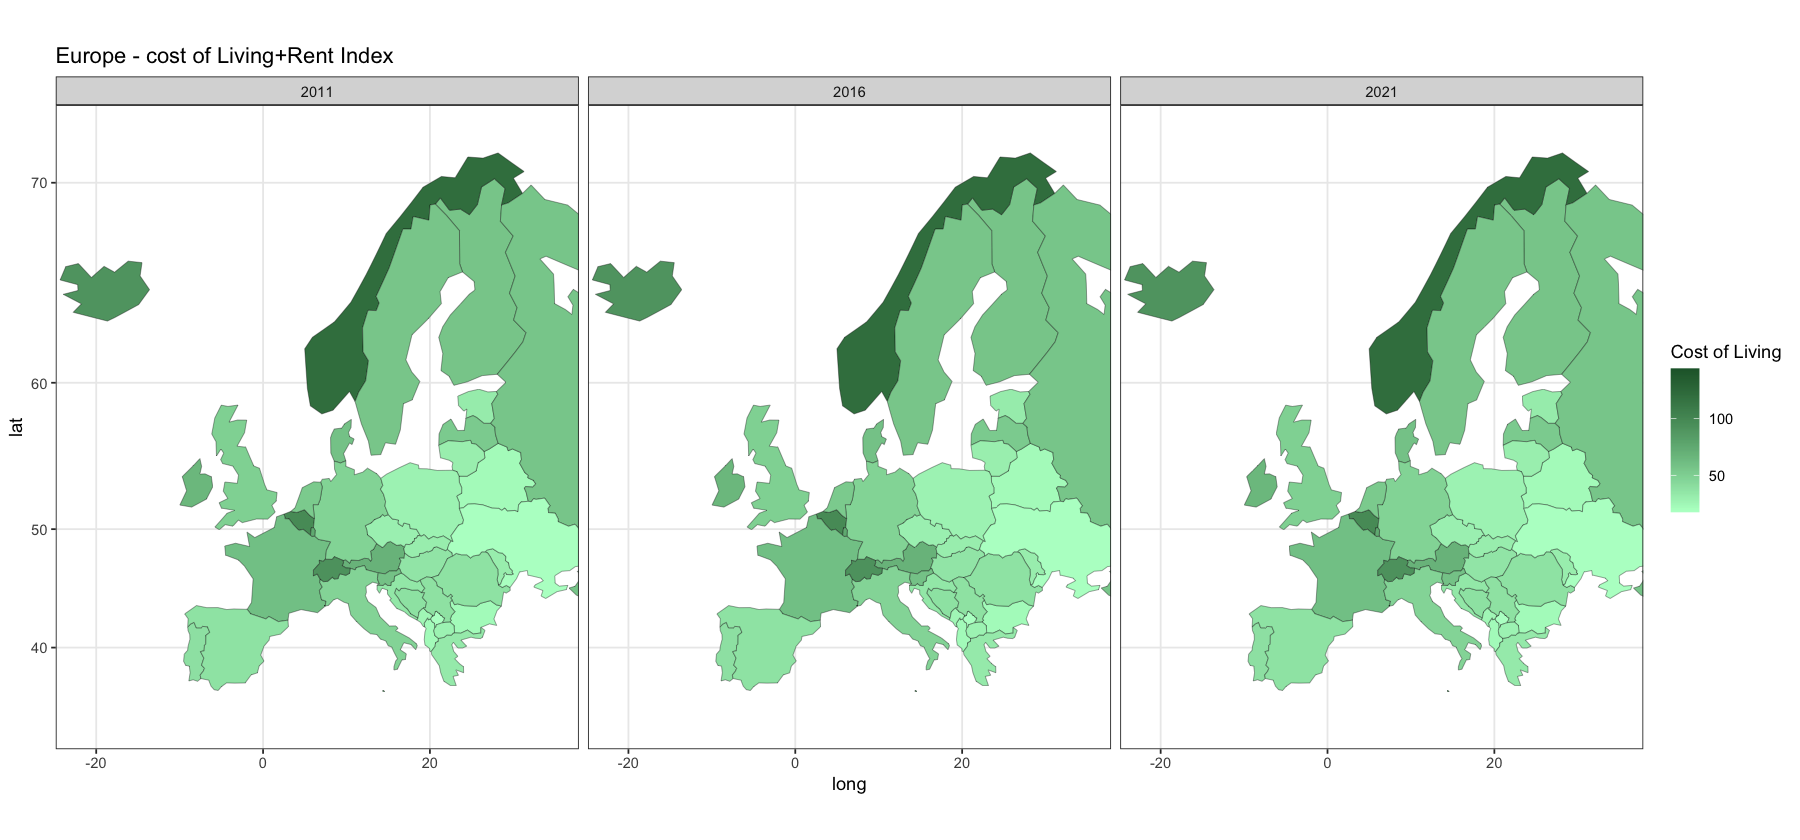

In [1112]:
# Plot the map
options(repr.plot.width=15, repr.plot.height=7)

ds_clean %>% filter(Year %in% c(2011, 2016, 2021)) %>%

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = CLRI),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-22, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Cost of Living", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - cost of Living+Rent Index") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               ) +

  theme_bw()

## Europe - Purchasing power

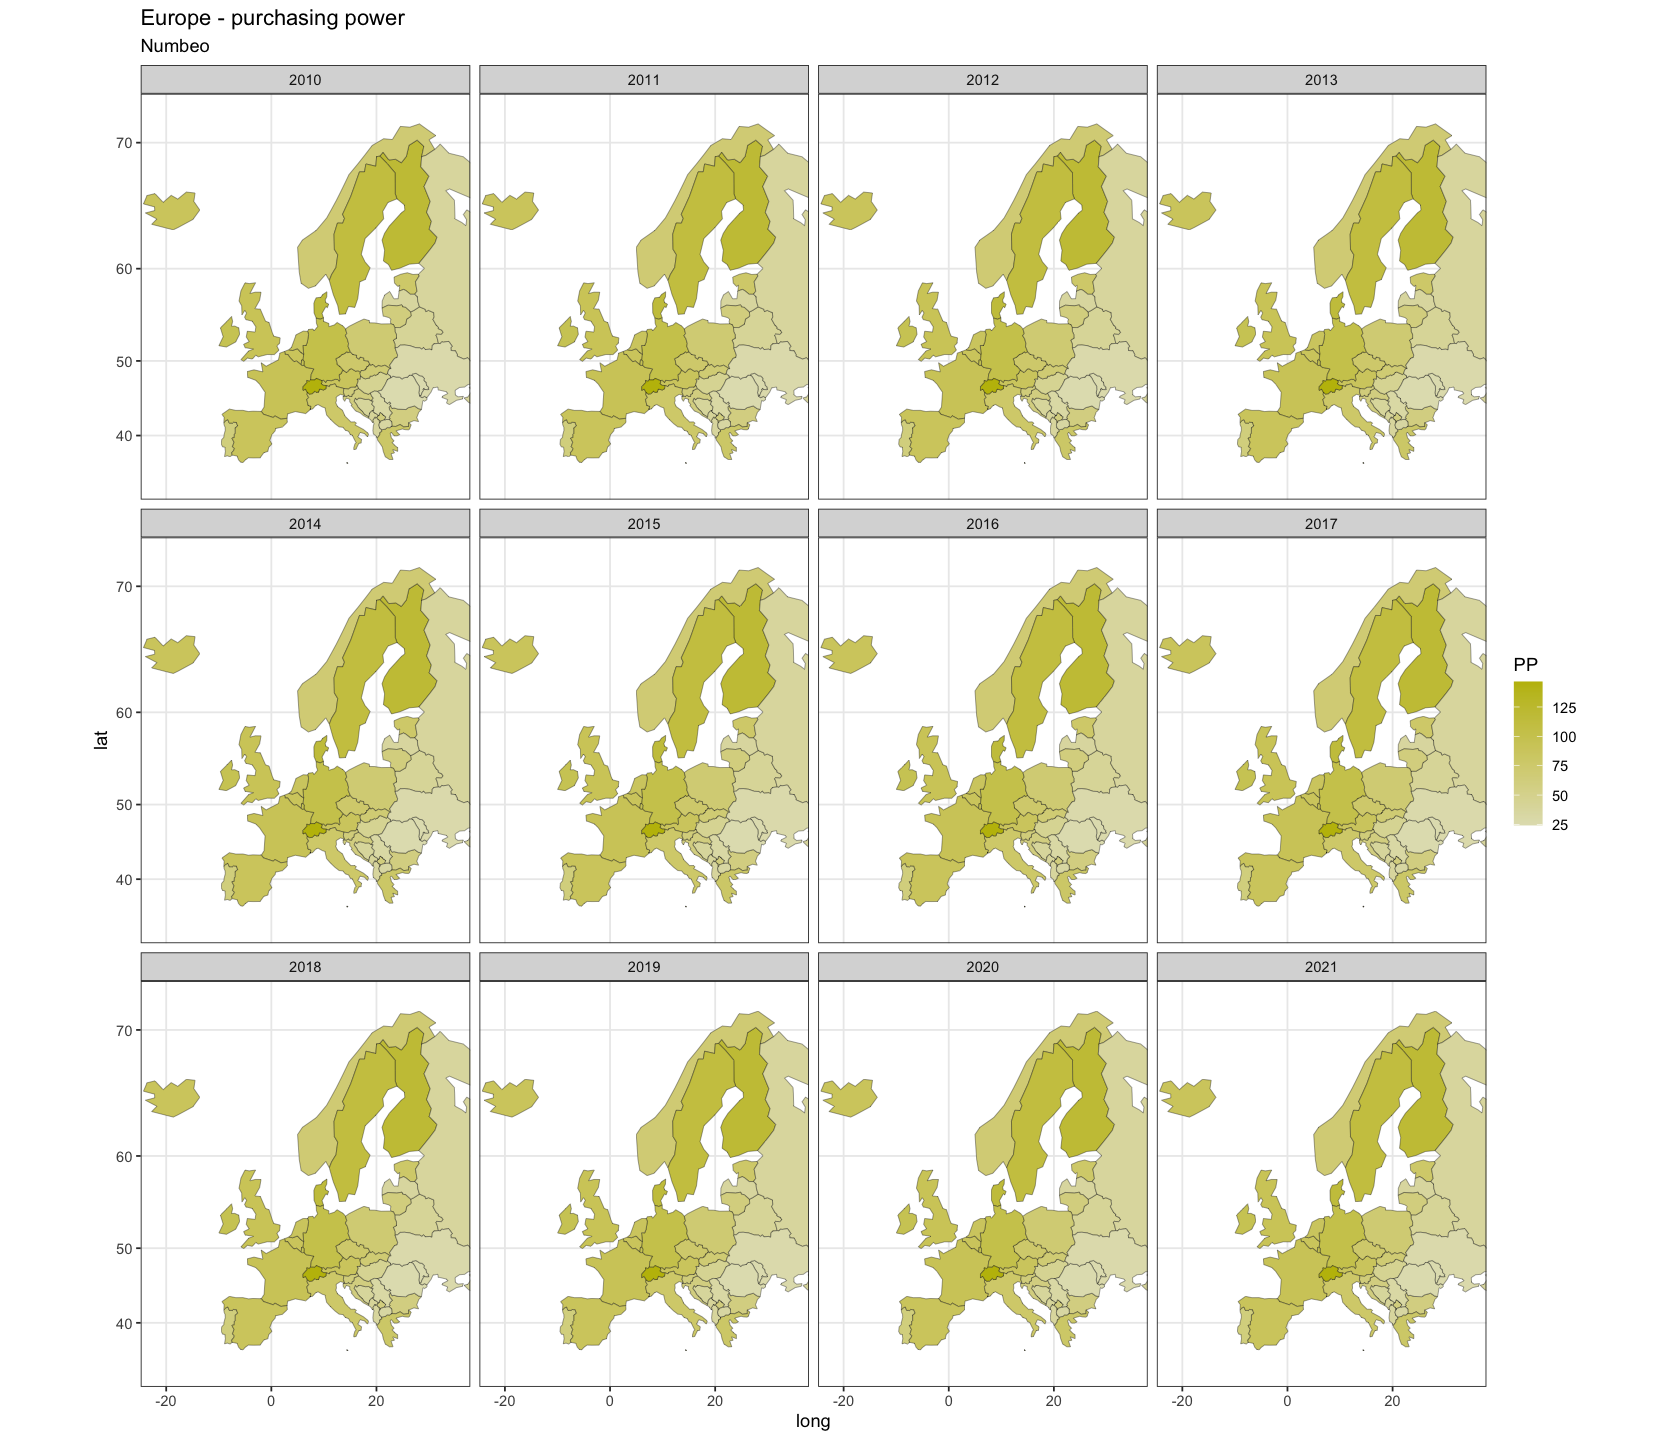

In [1126]:
# Plot the map
options(repr.plot.width=14, repr.plot.height=12)

ds_clean %>% #filter(Year %in% c(2011, 2016, 2021)) %>%

ggplot() + 
geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = PP),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-22, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "PP", low = "#E1E0BC", high = "#BFBC06", na.value = "white") +

  labs(title = "Europe - purchasing power",
       subtitle = "Numbeo") +

  facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

In [1138]:
nEurope <- c("Norway", "Sweden", "Denmark", "Iceland", "Finland", "Lithuania", "Latvia", "Estonia")

seEurope <- c("Slovenia", "Croatia", "Serbia", "Romania", "Bulgaria", "Bosnia and Herz.", "Macedonia", "Albania")

sEurope <- c("Greece", "Italy", "Spain", "Portugal")

eEurope <- c("Russia", "Ukraine", "Belarus")

wEurope <- c("Netherlands", "Switzerland", "United Kingdom", "France", "Ireland", "Belgium")

cEurope <- c("Germany", "Austria", "Hungary", "Poland", "Slovakia", "Czech Rep.")

In [1261]:
# Calculating percent difference from previous row (year)

diffPP_table <- 
    ds_clean %>% 
    arrange(Country, Year) %>% 
    filter(Continent == "Europe") %>% 
    filter(Year >= 2012) %>%
    group_by(Country) %>%
    mutate("DiffPP" = round((PP/lag(PP)-1)*100, 2)) %>%
    mutate("Location" = ifelse(Country %in% nEurope, "North Europe", 
                        ifelse(Country %in% sEurope, "Southern Europe", 
                        ifelse(Country %in% eEurope, "Eastern Europe", 
                        ifelse(Country %in% wEurope, "Western Europe", 
                        ifelse(Country %in% seEurope, "Balkan", 
                        ifelse(Country %in% cEurope, "Central Europe", "other")))))))

diffPP_table %>% head(3)

Country CLI   RI    CLRI  GrocI RestI PP    Year Continent DiffPP Location
1 Albania 48.64 10.84 30.50 40.23 31.83 35.28 2013 Europe       NA  Balkan  
2 Albania 48.96 10.94 30.49 41.37 35.25 33.27 2014 Europe    -5.70  Balkan  
3 Albania 41.95  8.55 25.63 34.10 33.21 34.79 2015 Europe     4.57  Balkan

In [1176]:
options(repr.plot.width=9, repr.plot.height=10)

diffPP_chart <-
diffPP_table %>% filter(Location != "other") %>%

ggplot(aes(x=as.numeric(Year), y=DiffPP, color = Country)) +
geom_line(show.legend = FALSE)+
scale_x_continuous(limits = c(2013, 2021),
                   breaks = c(2013, 2015, 2017, 2019, 2021)) + 
labs(title = "Percent difference in purchasing power",
     subtitle = "Numbeo data",
     x = "Year",
     y = "% diff in PP") +
facet_wrap(.~Location, ncol = 1) +
theme_bw()

In [1177]:
options(repr.plot.width=9, repr.plot.height=10)

PP_chart <-
diffPP_table %>% filter(Location != "other") %>%

ggplot(aes(x=as.numeric(Year), y=PP, color = Country)) +
geom_line(show.legend = FALSE)+
scale_x_continuous(limits = c(2013, 2021),
                   breaks = c(2013, 2015, 2017, 2019, 2021)) + 
labs(title = "Purchasing power index",
     subtitle = "Numbeo data",
     x = "Year",
     y = "PP index") +
facet_wrap(.~Location, ncol = 1) +
theme_bw()

---

# Quality of life

### Quality of life - data scraping

In [1216]:
# qol_webpage_10 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2010")
# qol_webpage_11 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2011")
qol_webpage_12 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2012-Q1")
qol_webpage_13 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2013-Q1")
qol_webpage_14 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2014")
qol_webpage_15 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2015")
qol_webpage_16 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2016")
qol_webpage_17 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2017")
qol_webpage_18 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2018")
qol_webpage_19 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2019")
qol_webpage_20 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2020")
qol_webpage_21 <- read_html("https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2021")

tbls <- html_nodes(webpage, "table")

In [1217]:
# Create an empty list
qol_tbls_ls <- list()

In [1218]:
#2012
qol_tbls_ls$Table12 <- qol_webpage_12 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2012)

#2013
qol_tbls_ls$Table13 <- qol_webpage_13 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2013)

#2014
qol_tbls_ls$Table14 <- qol_webpage_14 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2014)

#2015
qol_tbls_ls$Table15 <- qol_webpage_15 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2015)

#2016
qol_tbls_ls$Table16 <- qol_webpage_16 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2016)

#2017
qol_tbls_ls$Table17 <- qol_webpage_17 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2017)

#2018
qol_tbls_ls$Table18 <- qol_webpage_18 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2018)

#2019
qol_tbls_ls$Table19 <- qol_webpage_19 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2019)

#2020
qol_tbls_ls$Table20 <- qol_webpage_20 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2020)

#2021
qol_tbls_ls$Table21 <- qol_webpage_21 %>%
        html_nodes("#t2") %>% 
        html_table(fill = TRUE) %>%
        .[[1]] %>%
        select(!(Rank)) %>% 
        mutate("Year" = 2021)

In [1219]:
# Make one long table
qol_table_allyears <- rbind(#qol_tbls_ls$Table10, qol_tbls_ls$Table11, 
                        qol_tbls_ls$Table12, qol_tbls_ls$Table13, 
                        qol_tbls_ls$Table14, qol_tbls_ls$Table15, qol_tbls_ls$Table16, qol_tbls_ls$Table17,
                        qol_tbls_ls$Table18, qol_tbls_ls$Table19, qol_tbls_ls$Table20, qol_tbls_ls$Table21
                       )

qol_table_all <- qol_table_allyears %>% 
    rename("QoL" = "Quality of Life Index",
           "PP" = "Purchasing Power Index",
           "Safe" = "Safety Index",
           "HP" = "Health Care Index",
           "CLI" = "Cost of Living Index",
           "PP2I" = "Property Price to Income Ratio",
           "Comm" = "Traffic Commute Time Index",
           "Poll" = "Pollution Index",
           "Clim" = "Climate Index") %>%
    mutate(Country = ifelse(Country == "Kosovo (Disputed Territory)", "Kosovo", Country)) %>%
    mutate(Country = ifelse(Country == "Bosnia And Herzegovina", "Bosnia and Herz.", Country)) %>%
    mutate(Country = ifelse(Country == "North Macedonia", "Macedonia", Country)) %>%
    mutate(Country = ifelse(Country == "Czech Republic", "Czech Rep.", Country))

qol_table_all %>% head(2)
qol_countries_table <- qol_table_all %>% distinct(Country)
qol_countries_table %>% head(2)

Country     QoL    PP     Safe  HP    CLI    PP2I Comm  Poll  Clim Year
1 Switzerland 194.11 127.42 74.22 79.51 148.69 6.53 30.88 35.49 -    2012
2 Germany     184.42 114.22 78.80 71.96  92.83 4.80 33.12 45.14 -    2012

Country    
1 Switzerland
2 Germany

In [1220]:
qol_countries <- 
qol_countries_table %>% 
    mutate("Continent" = ifelse(Country == "Kosovo", "Europe", 
                                countrycode(sourcevar = qol_countries_table$Country,
                                            origin = "country.name",
                                            destination = "continent")))

## NOW we have a table with DISTINCT countries & their continent
qol_countries %>% tail(2)

Country    Continent
1 Costa Rica Americas 
2 Azerbaijan Asia

In [1221]:
# We create a data frame with countries of a given continent
europe_countries <- countries %>% filter(Continent == "Europe") %>% distinct(Country)

# We turn that data into vector
vector_europe <- c(europe_countries$Country)
vector_europe
class(vector_europe)

[1] "Norway"           "Denmark"          "Netherlands"      "France"          
 [5] "Switzerland"      "Belgium"          "Ireland"          "Italy"           
 [9] "Finland"          "United Kingdom"   "Austria"          "Germany"         
[13] "Sweden"           "Spain"            "Portugal"         "Croatia"         
[17] "Greece"           "Slovenia"         "Czech Rep."       "Latvia"          
[21] "Hungary"          "Serbia"           "Montenegro"       "Albania"         
[25] "Bulgaria"         "Russia"           "Poland"           "Bosnia and Herz."
[29] "Lithuania"        "Romania"          "Belarus"          "Ukraine"         
[33] "Iceland"          "Malta"            "Slovakia"         "Estonia"         
[37] "Macedonia"        "Monaco"           "Moldova"          "Luxembourg"      
[41] "Kosovo"

[1] "character"

In [1222]:
worldMap <- getMap()

qol_indEU <- which(worldMap$NAME%in%vector_europe)  ## DEFINE the continent table

# worldMap$NAME  # "names" of the built-in countries

In [1228]:
# Extract longitutde and latitude border's coordinates of member states of EU

europeCoords_2 <- lapply(qol_indEU, function(i){
  df <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  df$region =as.character(worldMap$NAME[i])
  colnames(df) <- list("long", "lat", "region")
  return(df)
})

europeCoords_2 <- do.call("rbind", europeCoords_2)
europeCoords_2 %>% head(2)
qol_table_all %>% head(5)

long     lat      region 
1 20.59025 41.85540 Albania
2 20.46318 41.51509 Albania

Country              QoL    PP     Safe  HP    CLI    PP2I Comm  Poll  Clim
1 Switzerland          194.11 127.42 74.22 79.51 148.69 6.53 30.88 35.49 -   
2 Germany              184.42 114.22 78.80 71.96  92.83 4.80 33.12 45.14 -   
3 Norway               183.43  94.21 80.93 79.04 166.65 7.10 18.50 19.22 -   
4 United Arab Emirates 177.07 134.89 64.05 63.89  80.79 4.49 17.00 69.17 -   
5 New Zealand          174.28  88.59 53.19 86.81 107.37 5.71 25.25 17.08 -   
  Year
1 2012
2 2012
3 2012
4 2012
5 2012

In [1225]:
# Create a new and clean dataframe for EUROPE
qol_data_europe <- 
    qol_table_all %>% 
    filter(Country %in% vector_europe) %>%
    mutate("Continent" = "Europe")

qol_data_europe %>% filter(Country=="Sweden")

# qol_ds_clean <- merge(x = qol_data_europe, y = countries, by = "Country", all = TRUE)

# qol_ds_clean %>% head(2)

Country QoL    PP     Safe  HP    CLI    PP2I  Comm  Poll  Clim  Year
1  Sweden  171.72  99.33 63.76 86.76 109.02  9.01 23.00 32.50 -     2012
2  Sweden  191.36 108.25 68.19 78.70 110.72  8.75 27.90 18.79 -     2013
3  Sweden  180.92 106.11 61.72 75.22 103.68  9.41 34.07 17.51 -     2014
4  Sweden  193.86 110.95 57.91 76.29  82.91  9.25 26.90 15.14 -     2015
5  Sweden  185.81 128.22 56.88 74.33  75.70 11.19 32.05 18.30 61.8  2016
6  Sweden  172.74 107.23 53.35 70.64  75.88 11.77 31.60 17.87 59.13 2017
7  Sweden  176.81 113.01 50.74 70.42  83.70 10.52 30.68 19.10 75.08 2018
8  Sweden  178.67 111.38 50.65 70.95  71.55 10.26 30.29 18.01 74.92 2019
9  Sweden  175.95 101.73 52.93 69.23  69.85  9.27 30.49 18.09 73.97 2020
10 Sweden  171.40  90.55 52.80 68.80  79.17  8.56 29.89 18.44 74.92 2021
   Continent
1  Europe   
2  Europe   
3  Europe   
4  Europe   
5  Europe   
6  Europe   
7  Europe   
8  Europe   
9  Europe   
10 Europe

In [1236]:
# 2012
# The European dataframe
ds_clean_12 <- qol_data_europe %>% filter(Year == 2012)
europeCoords_12 <- europeCoords_2

# Add column values
europeCoords_12$QoL <- ds_clean_12$QoL[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$PP <- ds_clean_12$PP[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$Safe <- ds_clean_12$Safe[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$HP <- ds_clean_12$HP[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$CLI <- ds_clean_12$CLI[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$PP2I <- ds_clean_12$PP2I[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$Comm <- ds_clean_12$Comm[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$Poll <- ds_clean_12$Poll[match(europeCoords_12$region, ds_clean_12$Country)]
europeCoords_12$Clim <- ds_clean_12$Clim[match(europeCoords_12$region, ds_clean_12$Country)]

ds_clean_12 %>% head(1) #%>% arrange(Year) %>% filter(Continent == "Europe") %>% head(2)

Country     QoL    PP     Safe  HP    CLI    PP2I Comm  Poll  Clim Year
1 Switzerland 194.11 127.42 74.22 79.51 148.69 6.53 30.88 35.49 -    2012
  Continent
1 Europe

In [1238]:
# 2016
# The European dataframe
ds_clean_16 <- qol_data_europe %>% filter(Year == 2016)
europeCoords_16 <- europeCoords_2

# Add column values
europeCoords_16$QoL <- ds_clean_16$QoL[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$PP <- ds_clean_16$PP[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$Safe <- ds_clean_16$Safe[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$HP <- ds_clean_16$HP[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$CLI <- ds_clean_16$CLI[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$PP2I <- ds_clean_16$PP2I[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$Comm <- ds_clean_16$Comm[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$Poll <- ds_clean_16$Poll[match(europeCoords_16$region, ds_clean_16$Country)]
europeCoords_16$Clim <- ds_clean_16$Clim[match(europeCoords_16$region, ds_clean_16$Country)]

ds_clean_16 %>% head(1)

Country     QoL    PP     Safe  HP    CLI   PP2I Comm  Poll  Clim Year
1 Switzerland 208.54 178.74 74.27 68.88 123.1 8.57 28.73 23.02 70.5 2016
  Continent
1 Europe

In [1239]:
# 2019
# The European dataframe
ds_clean_19 <- qol_data_europe %>% filter(Year == 2019)
europeCoords_19 <- europeCoords_2

# Add column values
europeCoords_19$QoL <- ds_clean_19$QoL[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$PP <- ds_clean_19$PP[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$Safe <- ds_clean_19$Safe[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$HP <- ds_clean_19$HP[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$CLI <- ds_clean_19$CLI[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$PP2I <- ds_clean_19$PP2I[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$Comm <- ds_clean_19$Comm[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$Poll <- ds_clean_19$Poll[match(europeCoords_19$region, ds_clean_19$Country)]
europeCoords_19$Clim <- ds_clean_19$Clim[match(europeCoords_19$region, ds_clean_19$Country)]

ds_clean_19 %>% head(1)

Country QoL    PP     Safe  HP    CLI   PP2I Comm  Poll  Clim Year Continent
1 Denmark 198.57 114.39 75.75 79.41 81.38 6.93 28.51 22.14 81.8 2019 Europe

In [1240]:
# 2020
# The European dataframe
ds_clean_20 <- qol_data_europe %>% filter(Year == 2020)
europeCoords_20 <- europeCoords_2

# Add column values
europeCoords_20$QoL <- ds_clean_20$QoL[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$PP <- ds_clean_20$PP[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$Safe <- ds_clean_20$Safe[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$HP <- ds_clean_20$HP[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$CLI <- ds_clean_20$CLI[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$PP2I <- ds_clean_20$PP2I[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$Comm <- ds_clean_20$Comm[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$Poll <- ds_clean_20$Poll[match(europeCoords_20$region, ds_clean_20$Country)]
europeCoords_20$Clim <- ds_clean_20$Clim[match(europeCoords_20$region, ds_clean_20$Country)]

ds_clean_20 %>% head(1)

Country QoL    PP     Safe HP CLI PP2I Comm  Poll  Clim Year Continent
1 Denmark 192.67 100.88 74.9 80 83  7.45 28.85 21.33 81.8 2020 Europe

### Quality of life - plots

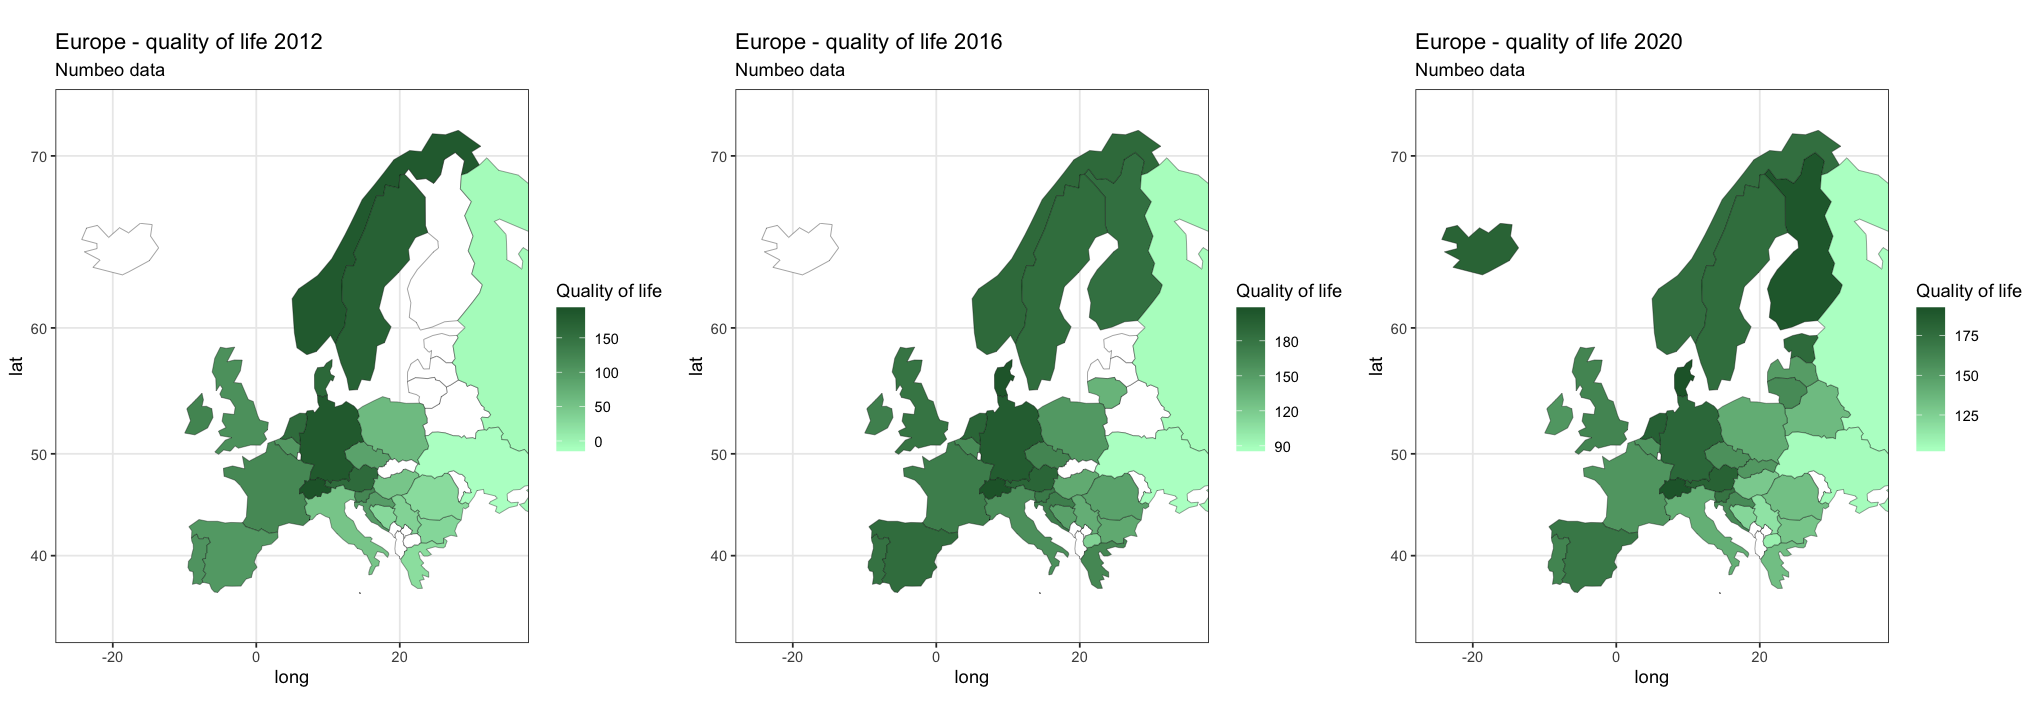

In [1254]:
############################## 2012 ##############################
options(repr.plot.width=17, repr.plot.height=6)

qol_plot12 <- 
qol_data_europe %>% filter(Year == 2012) %>%
ggplot() + 
geom_polygon(data = europeCoords_12, aes(x = long, y = lat, group = region, fill = QoL),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Quality of life", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - quality of life 2012",
       subtitle = "Numbeo data") +

  #facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

############################## 2016 ##############################

qol_plot16 <- 
qol_data_europe %>% filter(Year == 2016) %>%

ggplot() + 
geom_polygon(data = europeCoords_16, aes(x = long, y = lat, group = region, fill = QoL),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Quality of life", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - quality of life 2016",
       subtitle = "Numbeo data") +

  #facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

############################## 2020 ##############################

qol_plot20 <- 
qol_data_europe %>% filter (Year == 2020) %>%

ggplot() + 
geom_polygon(data = europeCoords_20, aes(x = long, y = lat, group = region, fill = QoL),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(32, 71)) +

  scale_fill_gradient(name = "Quality of life", low = "#B6FFCC", high = "#216335", na.value = "white") +

  labs(title = "Europe - quality of life 2020",
       subtitle = "Numbeo data") +

  #facet_wrap(.~Year) +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

plot_grid(
  qol_plot12, qol_plot16, qol_plot20, ncol=3,
  align = "h"
)

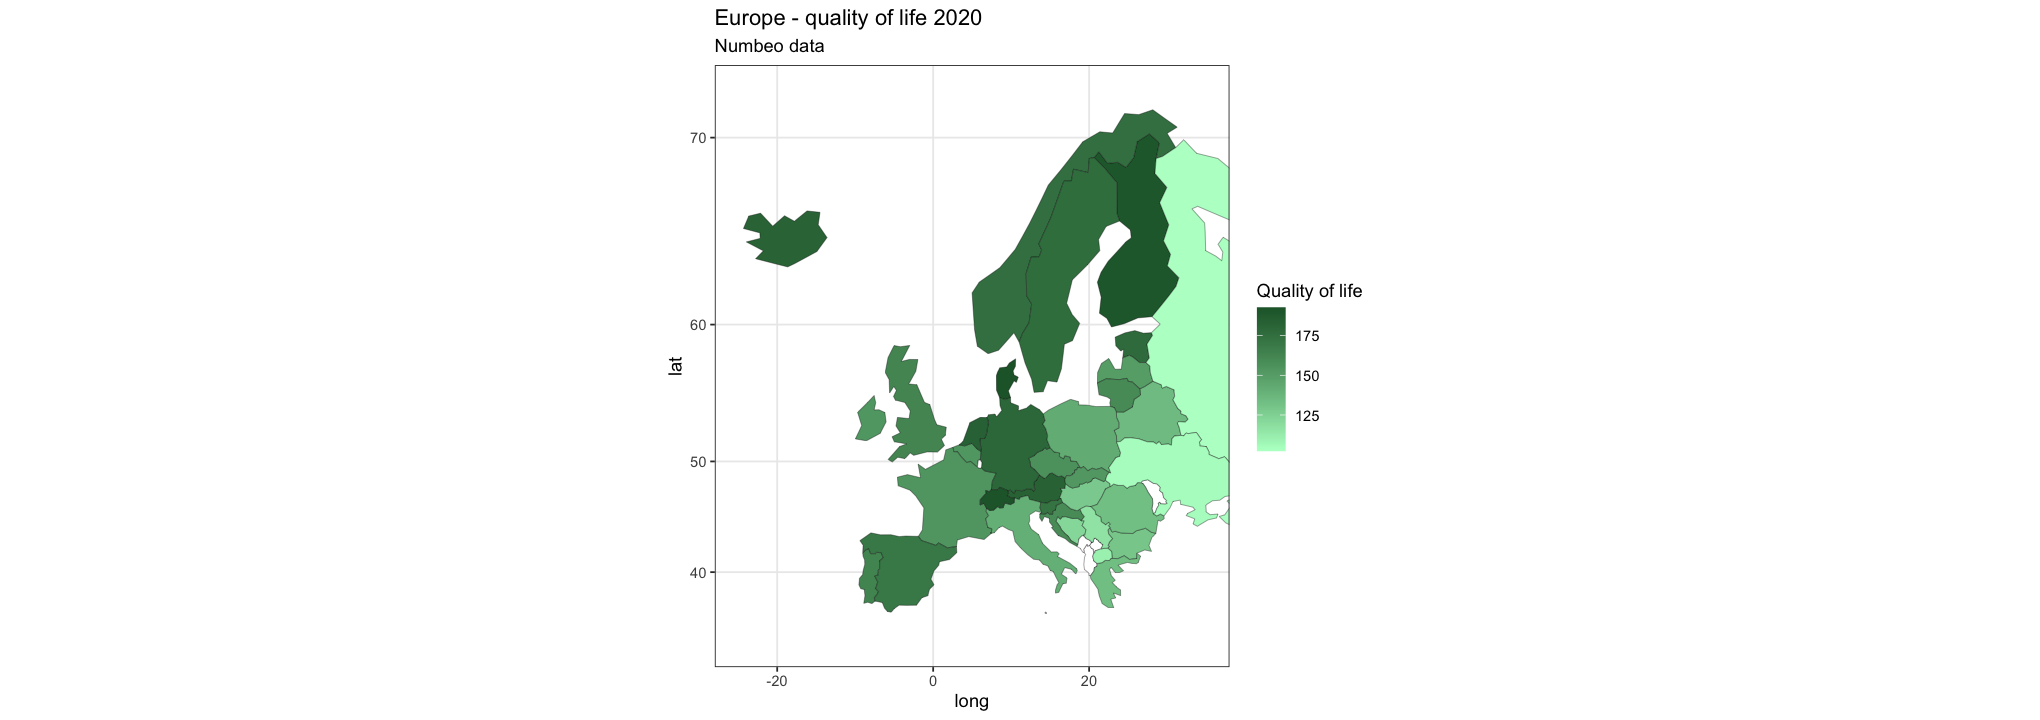

In [1256]:
qol_plot20

### Health care index

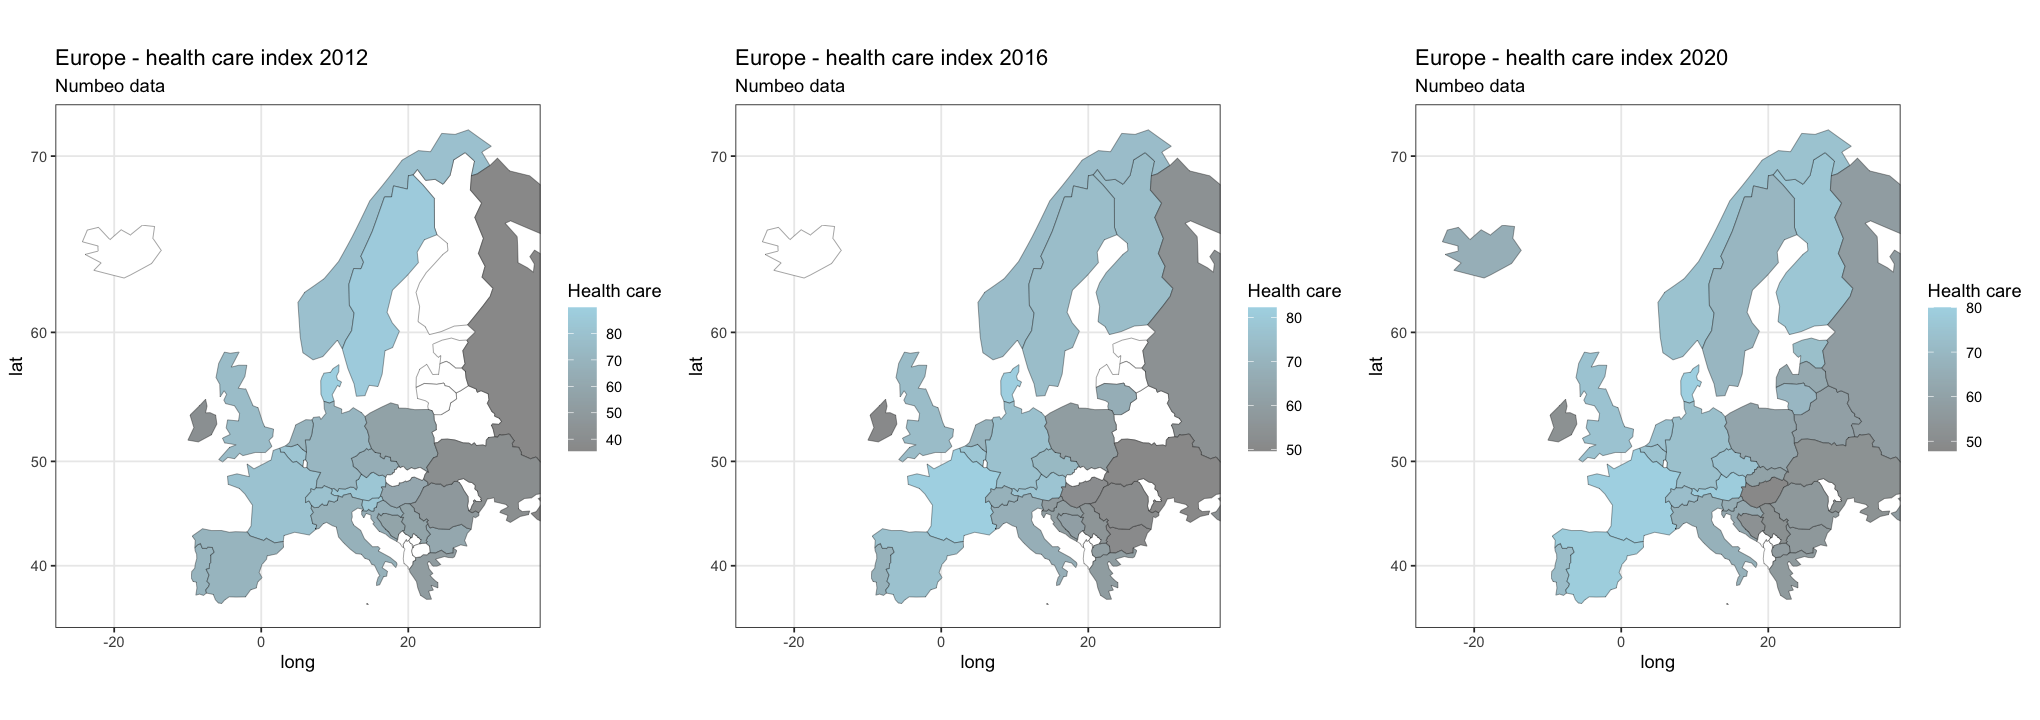

In [1252]:
############################## 2012 ##############################
options(repr.plot.width=17, repr.plot.height=6)

hc_plot12 <- 
qol_data_europe %>% filter(Year == 2012) %>%
ggplot() + 
geom_polygon(data = europeCoords_12, aes(x = long, y = lat, group = region, fill = HP),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Health care", low = "#9A9A9A", high = "#add8e6", na.value = "white") +

  labs(title = "Europe - health care index 2012",
       subtitle = "Numbeo data") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

############################## 2016 ##############################

hc_plot16 <- 
qol_data_europe %>% filter(Year == 2016) %>%

ggplot() + 
geom_polygon(data = europeCoords_16, aes(x = long, y = lat, group = region, fill = HP),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Health care", low = "#9A9A9A", high = "#add8e6", na.value = "white") +

  labs(title = "Europe - health care index 2016",
       subtitle = "Numbeo data") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

############################## 2020 ##############################

hc_plot20 <- 
qol_data_europe %>% filter (Year == 2020) %>%

ggplot() + 
geom_polygon(data = europeCoords_20, aes(x = long, y = lat, group = region, fill = HP),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Health care", low = "#9A9A9A", high = "#add8e6", na.value = "white") +

  labs(title = "Europe - health care index 2020",
       subtitle = "Numbeo data") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()


plot_grid(
  hc_plot12, hc_plot16, hc_plot20, ncol=3,
  align = "h"
)

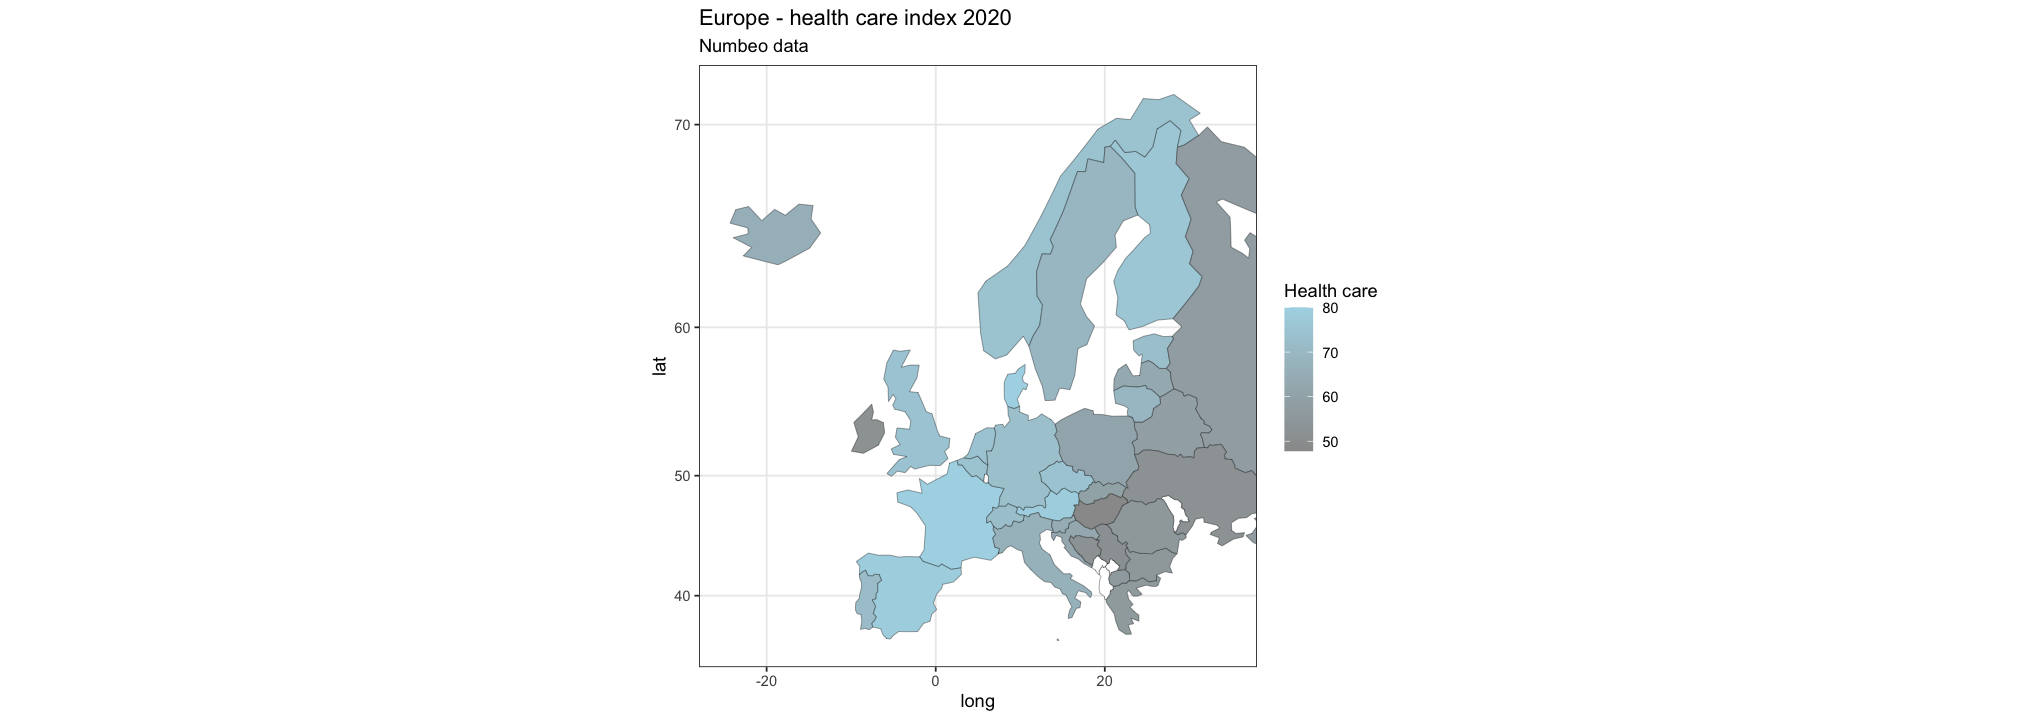

In [1253]:
hc_plot20

### Safety

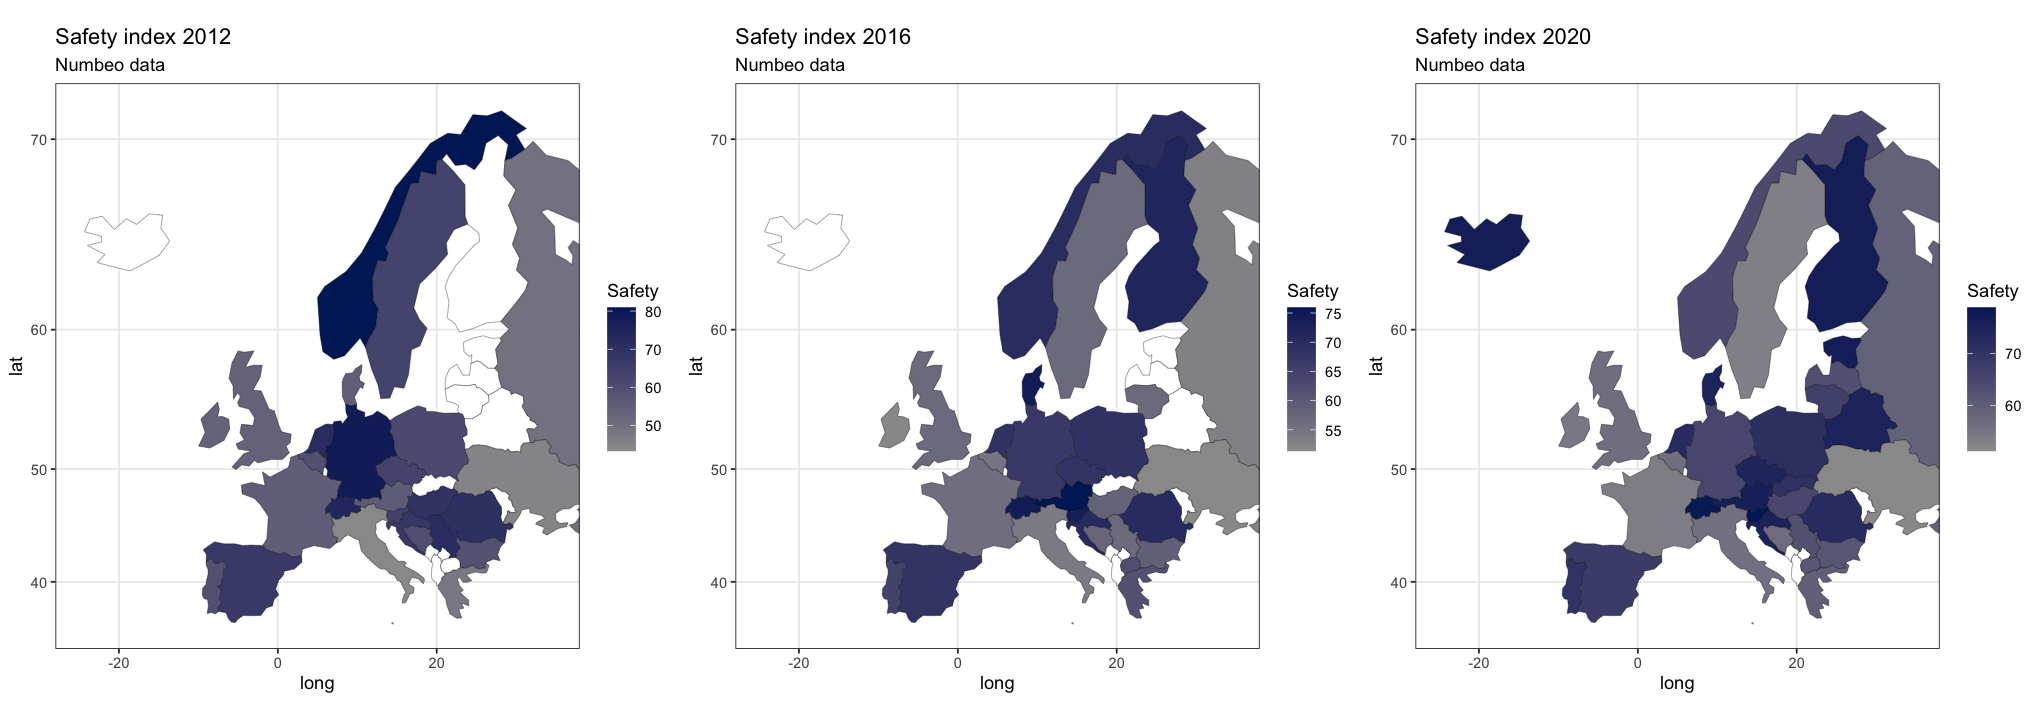

In [1259]:
############################## 2012 ##############################
options(repr.plot.width=17, repr.plot.height=6)

safe_plot12 <- 
qol_data_europe %>% filter(Year == 2012) %>%
ggplot() + 
geom_polygon(data = europeCoords_12, aes(x = long, y = lat, group = region, fill = Safe),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Safety", low = "#9A9A9A", high = "#002366", na.value = "white") +

  labs(title = "Safety index 2012",
       subtitle = "Numbeo data") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

############################## 2016 ##############################

safe_plot16 <- 
qol_data_europe %>% filter(Year == 2016) %>%

ggplot() + 
geom_polygon(data = europeCoords_16, aes(x = long, y = lat, group = region, fill = Safe),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Safety", low = "#9A9A9A", high = "#002366", na.value = "white") +

  labs(title = "Safety index 2016",
       subtitle = "Numbeo data") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

############################## 2020 ##############################

safe_plot20 <- 
qol_data_europe %>% filter (Year == 2020) %>%

ggplot() + 
geom_polygon(data = europeCoords_20, aes(x = long, y = lat, group = region, fill = Safe),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Safety", low = "#9A9A9A", high = "#002366", na.value = "white") +

  labs(title = "Safety index 2020",
       subtitle = "Numbeo data") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()


plot_grid(
  safe_plot12, safe_plot16, safe_plot20, ncol=3,
  align = "h"
)

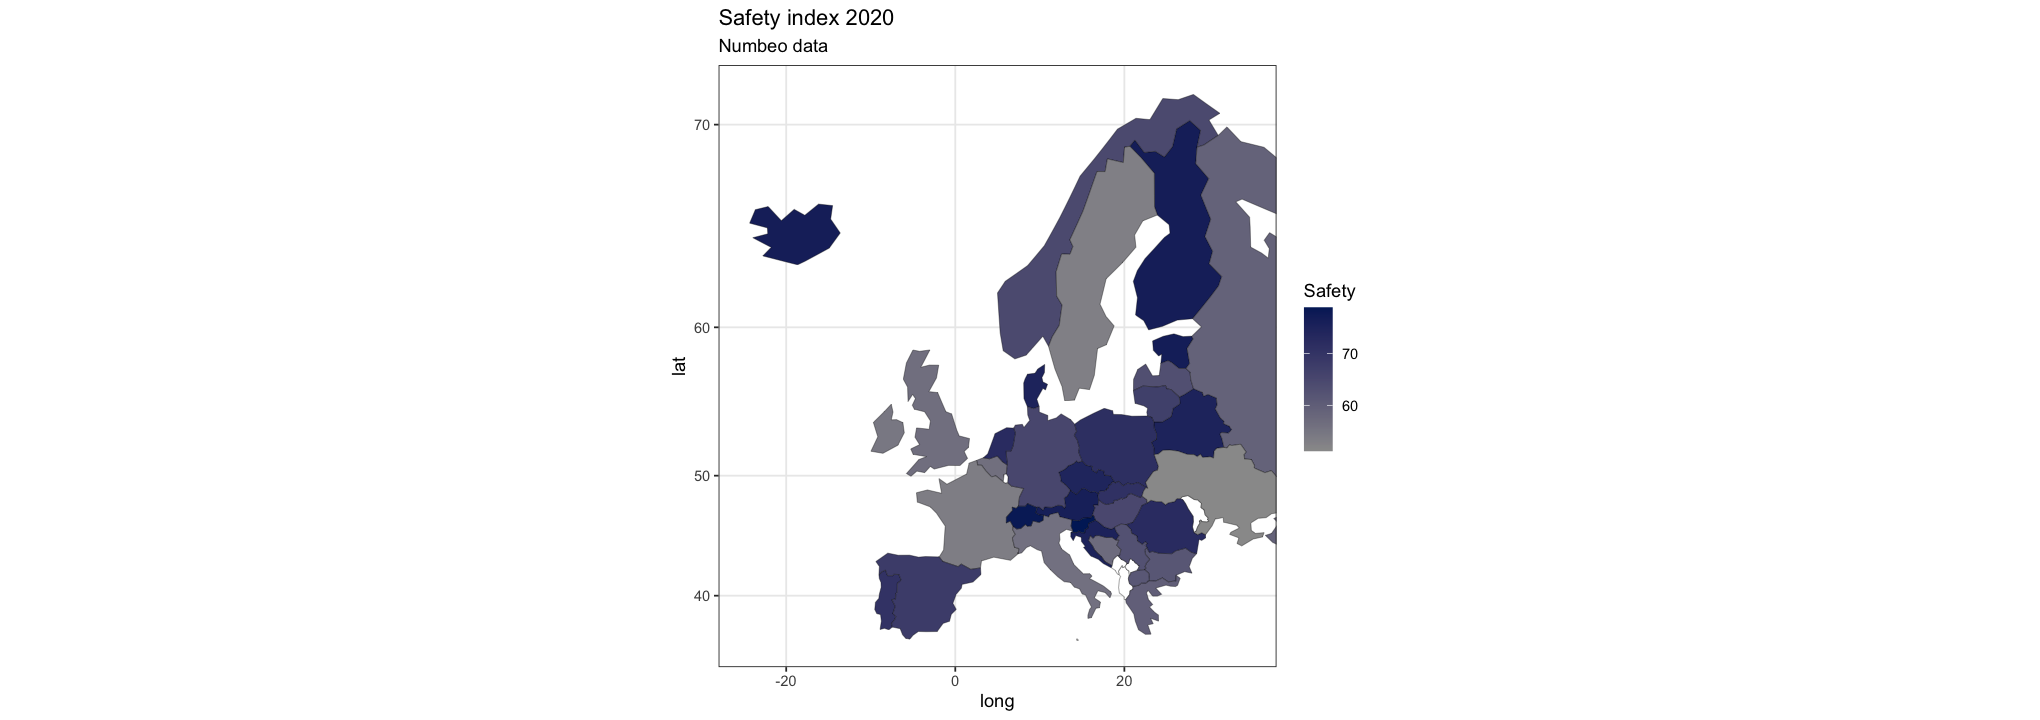

In [1260]:
safe_plot20

### Safety level - bar chart

In [859]:
order_safeC <- qol_data_europe %>% arrange(Safe) %>% filter(Year == 2019) %>% tail(10) %>% distinct(Country)
order_safeC_v <- c(order_safeC$Country)
order_safeC_v

order_unsafeC <- qol_data_europe %>% arrange(Safe) %>% filter(Year == 2019) %>% head(10) %>% distinct(Country)
order_unsafeC_v <- c(order_unsafeC$Country)
order_unsafeC_v

[1] "Czech Rep."  "Croatia"     "Denmark"     "Belarus"     "Iceland"    
 [6] "Finland"     "Slovenia"    "Switzerland" "Austria"     "Estonia"

[1] "Sweden"           "Ukraine"          "France"           "Italy"           
 [5] "Ireland"          "Bosnia and Herz." "United Kingdom"   "Belgium"         
 [9] "Russia"           "Bulgaria"

#### Numbeo: Europe - safest

In [1186]:
options(repr.plot.width=10, repr.plot.height=4)

numbeo_europe_safe <- 
qol_data_europe %>% filter(Country %in% order_safeC_v) %>% filter(Year %in% c(2019)) %>% 

ggplot(aes(x = reorder(Country, Safe), y = Safe, fill = Safe)) +

geom_bar(stat = "identity") +
coord_flip() + 
scale_y_continuous(name="Safety index", 
                   limits = c(0,90), 
                   breaks = seq(0, 90, 10)) +
scale_fill_gradient(name = "Safety", low = "#6D8ACC", high = "#164FCE", na.value = "white") +
scale_x_discrete(name="Country") +
labs(title = "Numbeo - safety index 2019",
     subtitle = "Safest European countries",
     fill = "Safety") +

theme(axis.text.x = element_text(face="bold", color="black", size=8, angle=0),
      axis.text.y = element_text(face="bold", color="black", size=8, angle=0),
      axis.title.x = element_blank(),
      axis.title.y = element_blank())

#### Numbeo: Europe - unsafest

In [1190]:
options(repr.plot.width=8, repr.plot.height=4)

numbeo_europe_unsafe <- 
qol_data_europe %>% filter(Country %in% order_unsafeC_v) %>% filter(Year %in% c(2019)) %>% 

ggplot(aes(x = reorder(Country, Safe), y = Safe, fill = Safe)) +

geom_bar(stat = "identity") +
coord_flip() + 
scale_y_continuous(name="Numbeo safety index", 
                   limits = c(0,90), 
                   breaks = seq(0, 90, 10)) +
scale_fill_gradient(name = "Safety", low = "#CC0000", high = "#C6A8A8", na.value = "white") +
scale_x_discrete(name="Country") +
labs(title = "Numbeo - safety index 2019",
     subtitle = "Unsafest European countries",
     fill = "Safety") +

theme(axis.text.x = element_text(face="bold", color="black", size=8, angle=0),
      axis.text.y = element_text(face="bold", color="black", size=8, angle=0),
      axis.title.y = element_blank())

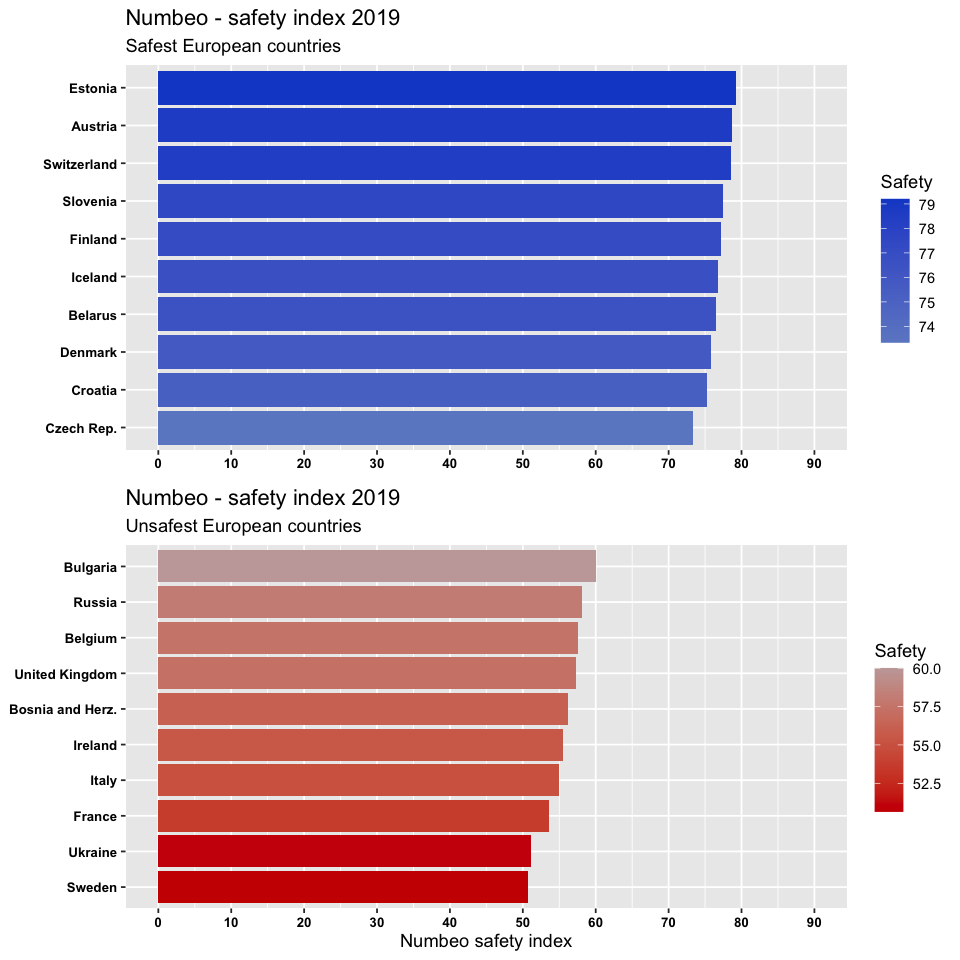

In [1191]:
options(repr.plot.width=8, repr.plot.height=8)

comp_eu <- plot_grid(
  numbeo_europe_safe, numbeo_europe_unsafe, ncol=1,
  align = "v"
)

comp_eu

## Numbeo - comparing safety worldwide

In [884]:
ww_order_safeC <- qol_table_all %>% arrange(Safe) %>% filter(Year == 2019) %>% tail(10) %>% distinct(Country)
ww_order_safeC_v <- c(ww_order_safeC$Country)
ww_order_safeC_v

ww_order_unsafeC <- qol_table_all %>% arrange(Safe) %>% filter(Year == 2019) %>% head(10) %>% distinct(Country)
ww_order_unsafeC_v <- c(ww_order_unsafeC$Country)
ww_order_unsafeC_v

[1] "Switzerland"          "Singapore"            "Austria"             
 [4] "Estonia"              "Georgia"              "Hong Kong"           
 [7] "Taiwan"               "United Arab Emirates" "Japan"               
[10] "Qatar"

[1] "South Africa" "Brazil"       "Kazakhstan"   "Argentina"    "Malaysia"    
 [6] "Mexico"       "Colombia"     "Egypt"        "Sweden"       "Iran"

#### Numebo: worldwide - safest

In [1182]:
options(repr.plot.width=10, repr.plot.height=4)

numbeo_ww_safe <- 
qol_table_all %>% filter(Country %in% ww_order_safeC_v) %>% filter(Year == 2019) %>% 

ggplot(aes(x = reorder(Country, Safe), y = Safe, fill = Safe)) +

geom_bar(stat = "identity") +
coord_flip() + 
scale_y_continuous(name="Safety index", 
                   limits = c(0, 90), 
                   breaks = seq(0, 90, 10)) +
scale_fill_gradient(name = "Safety", low = "#6D8ACC", high = "#164FCE", na.value = "white") +
scale_x_discrete(name="Country") +
labs(title = "Numbeo - safety index 2019",
     subtitle = "Safest countries worldwide",
     fill = "Safety") +

theme(axis.text.x = element_text(face="bold", color="black", size=8, angle=0),
      axis.text.y = element_text(face="bold", color="black", size=8, angle=0),
      axis.title.x = element_blank(),
      axis.title.y = element_blank())

In [1183]:
options(repr.plot.width=8, repr.plot.height=4)

numbeo_ww_unsafe <- 
qol_table_all %>% filter(Country %in% ww_order_unsafeC_v) %>% filter(Year %in% c(2019)) %>% 

ggplot(aes(x = reorder(Country, Safe), y = Safe, fill = Safe)) +

geom_bar(stat = "identity") +
coord_flip() + 
scale_y_continuous(name="Numbeo safety index", 
                   limits = c(0, 90), 
                   breaks = seq(0, 90, 10)) +
scale_fill_gradient(name = "Safety", low = "#CC0000", high = "#C6A8A8", na.value = "white") +
scale_x_discrete(name="Country") +
labs(title = "Numbeo - safety index 2019",
     subtitle = "Unsafest countries worldwide",
     fill = "Safety") +

theme(axis.text.x = element_text(face="bold", color="black", size=8, angle=0),
      axis.text.y = element_text(face="bold", color="black", size=8, angle=0),
      axis.title.y = element_blank())

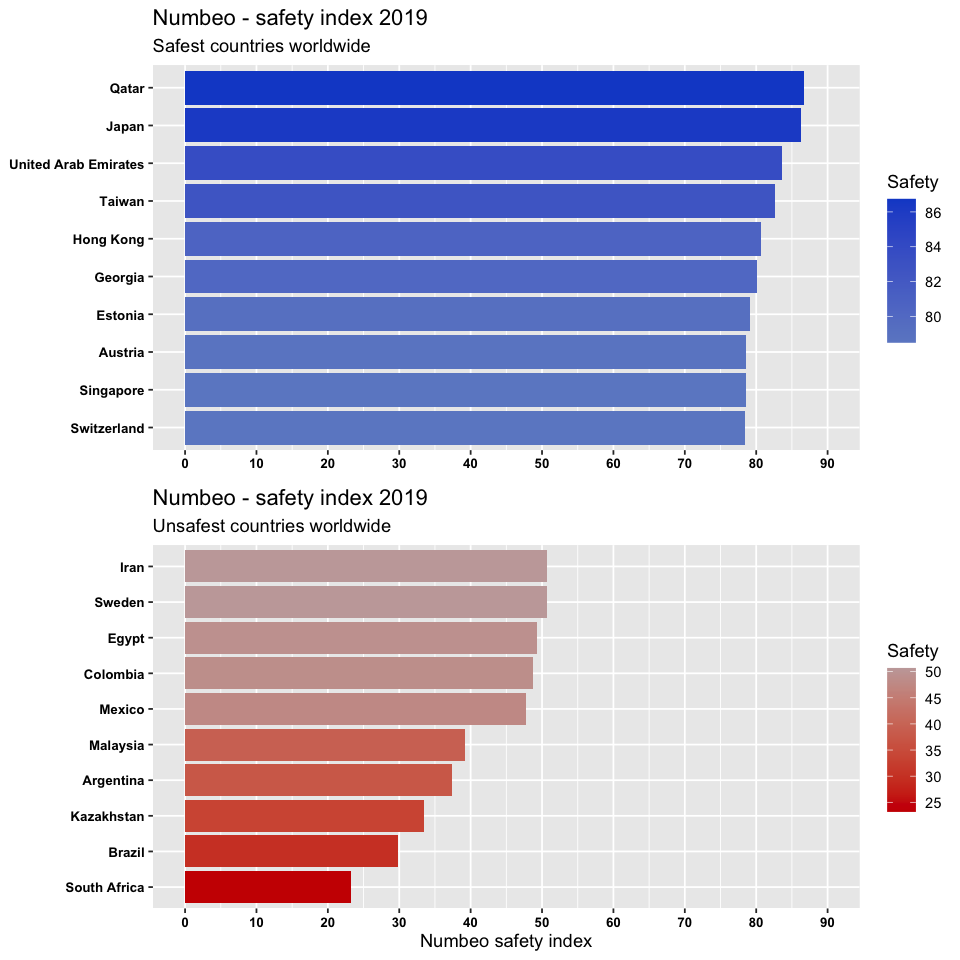

In [1192]:
# cowplot
options(repr.plot.width=8, repr.plot.height=8)

comp_ww <- plot_grid(
  numbeo_ww_safe, numbeo_ww_unsafe, ncol=1,
  align = "v"
)

comp_ww

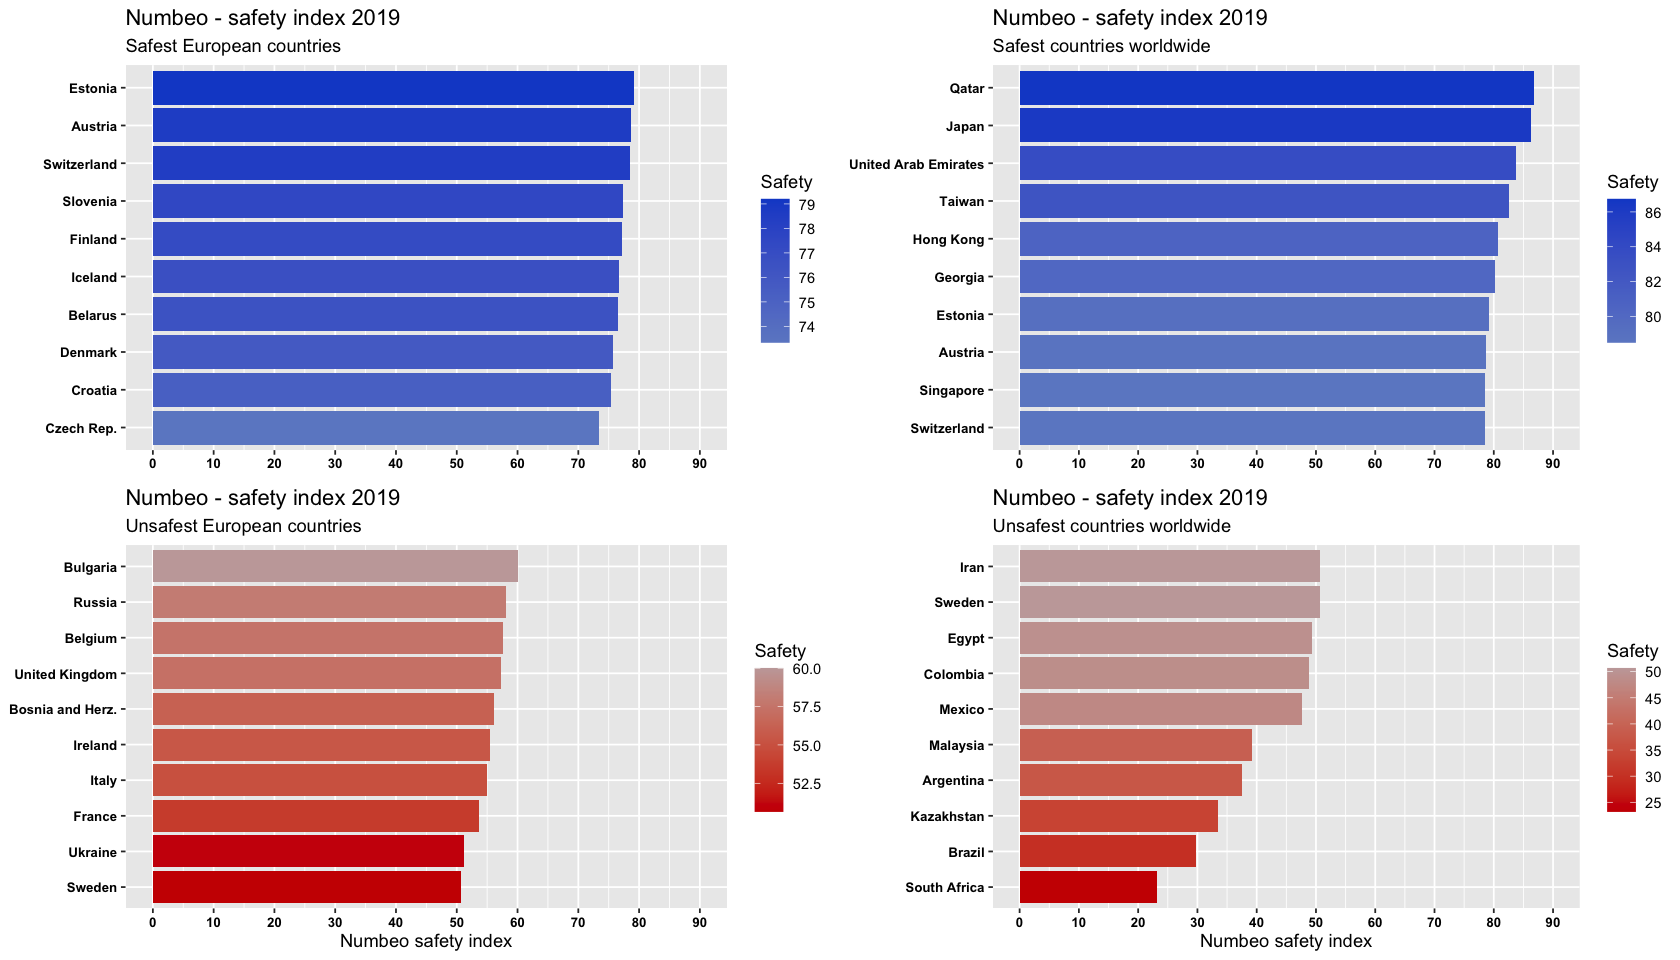

In [1193]:
options(repr.plot.width=14, repr.plot.height=8)

plot_grid(
  comp_eu, comp_ww
)

## Safety from a different source

#### Reliable source

In [577]:
## Sweden second UNSAFEST??? What? Let me check a different source

# https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Archive:Quality_of_life_in_Europe_-_facts_and_views_-_economic_and_physical_safety&oldid=400085#Data_sources_and_availability

#### Another semi-reliable source

In [615]:
## Although I haven't heard of the website before, they take into account relevant factors (such as hostilities 
## in Ukraine, Phillipines, Yemen; sanctions in Russia). 

## https://www.gfmag.com/global-data/non-economic-data/worlds-safest-countries-2019

## [ ] compare results with numbeo

In [739]:
## gfmag

html <- read_html("gfmag_table.html")

gfmag_tbls_ls <- html %>%
        html_nodes("table") %>%
        .[[1]] %>%
        html_table(fill = TRUE) %>%
        mutate(X2 = ifelse(X2 == "Czech Republic", "Czech Rep.", X2)) %>%
        mutate(X2 = ifelse(X1 == "56", "Bosnia and Herz.", X2)) %>%
        mutate(X2 = ifelse(X2 == "Netherland", "Netherlands", X2))

In [741]:
# gfmag_tbls_ls %>% distinct(X2) %>% arrange(X2) %>% head(15)

# gfmag_tbls_ls %>% head(35)

In [742]:
# gfmag_tbls_ls %>% filter(as.numeric(X1) > 50)

In [743]:
gfmag_table <- 
    gfmag_tbls_ls[-1,] %>% 
    select(X2, X3) %>%
    rename("Country" = "X2", "GFmag" = "X3") %>%
    mutate("Continent" = ifelse(Country %in% vector_europe, "Europe", "RestOfWorld"))

gfmag_table %>% head(2)
gfmag_table %>% tail(2)

Country     GFmag Continent
1 Iceland     6.16  Europe   
2 Switzerland 7.01  Europe

Country     GFmag Continent  
1 Yemen       15.93 RestOfWorld
2 Philippines 17.70 RestOfWorld

In [744]:
# europe coords and add GFmag score to it

gf_indEU <- which(worldMap$NAME%in%vector_europe)  ## DEFINE the continent table

In [745]:
europeCoords_3 <- lapply(gf_indEU, function(i){
  df <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  df$region =as.character(worldMap$NAME[i])
  colnames(df) <- list("long", "lat", "region")
  return(df)
})

europeCoords_3 <- do.call("rbind", europeCoords_3) 

europeCoords_3$GFmag <- as.numeric(gfmag_table$GFmag[match(europeCoords_3$region, gfmag_table$Country)])

# europeCoords_3$GFmag

europeCoords_3 %>% head(2)

# lapply(europeCoords_3, class)

long     lat      region  GFmag
1 20.59025 41.85540 Albania 10.48
2 20.46318 41.51509 Albania 10.48

$long
[1] "numeric"

$lat
[1] "numeric"

$region
[1] "character"

$GFmag
[1] "numeric"

### GF magazine - safety

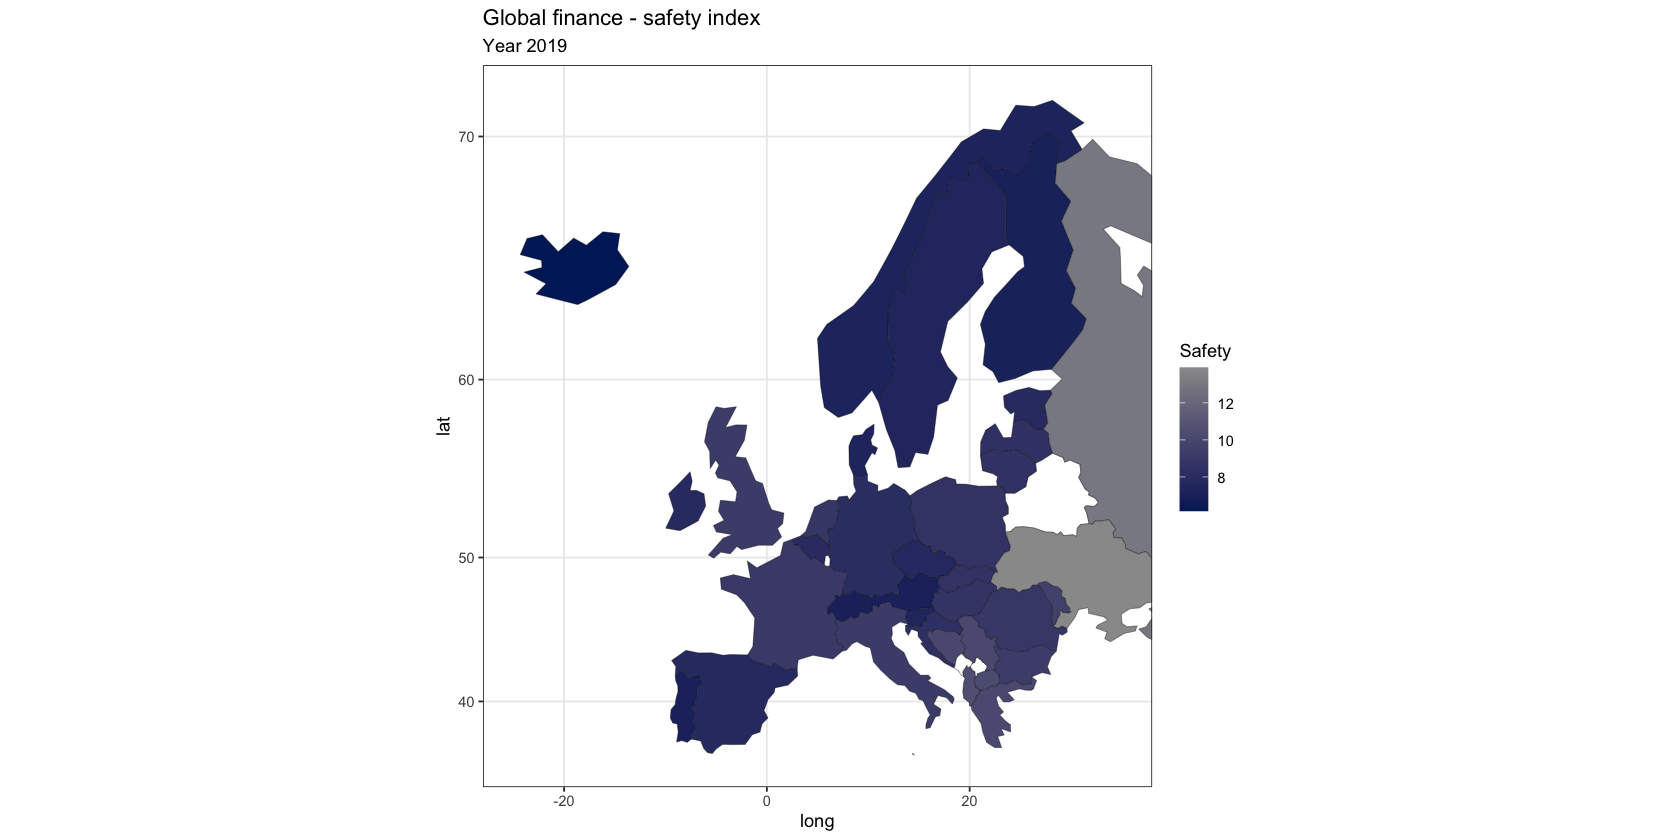

In [746]:
# Plot the map
options(repr.plot.width=14, repr.plot.height=7)

gfmag_table %>% filter(Continent == "Europe") %>%

ggplot() + 
geom_polygon(data = europeCoords_3, aes(x = long, y = lat, group = region, fill = GFmag),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-25, 35),  ylim = c(35, 70.5)) +

  scale_fill_gradient(name = "Safety", low = "#002366", high = "#9A9A9A", na.value = "white") +

  labs(title = "Global finance - safety index",
       subtitle = "Year 2019") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  theme_bw()

### Correlation between quality of life & purchasing power

In [942]:
nEurope <- c("Norway", "Sweden", "Denmark", "Iceland", "Finland", "Lithuania", "Latvia", "Estonia")

seEurope <- c("Slovenia", "Croatia", "Serbia", "Romania", "Bulgaria", "Bosnia and Herz.", "Macedonia")

sEurope <- c("Greece", "Italy", "Spain", "Portugal")

eEurope <- c("Russia", "Ukraine", "Belarus")

wEurope <- c("Netherlands", "Switzerland", "United Kingdom", "France", "Ireland", "Belgium")

cEurope <- c("Germany", "Austria", "Hungary", "Poland", "Slovakia", "Czech Rep.")

In [981]:
scplot_table <- 
    qol_data_europe %>% 
    select(Country, QoL, HP, Year) %>% 
    mutate("Location" = ifelse(Country %in% nEurope, "North Europe", 
                        ifelse(Country %in% sEurope, "Southern Europe", 
                        ifelse(Country %in% eEurope, "Eastern Europe", 
                        ifelse(Country %in% wEurope, "Western Europe", 
                        ifelse(Country %in% seEurope, "Balkan", 
                        ifelse(Country %in% cEurope, "Central Europe", "other")))))))

# scplot_table %>% filter(Year == 2020) %>% arrange(HP) #%>% filter(Location == "North Europe")

#### Scatterplot Europe - quality of life vs. HP

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



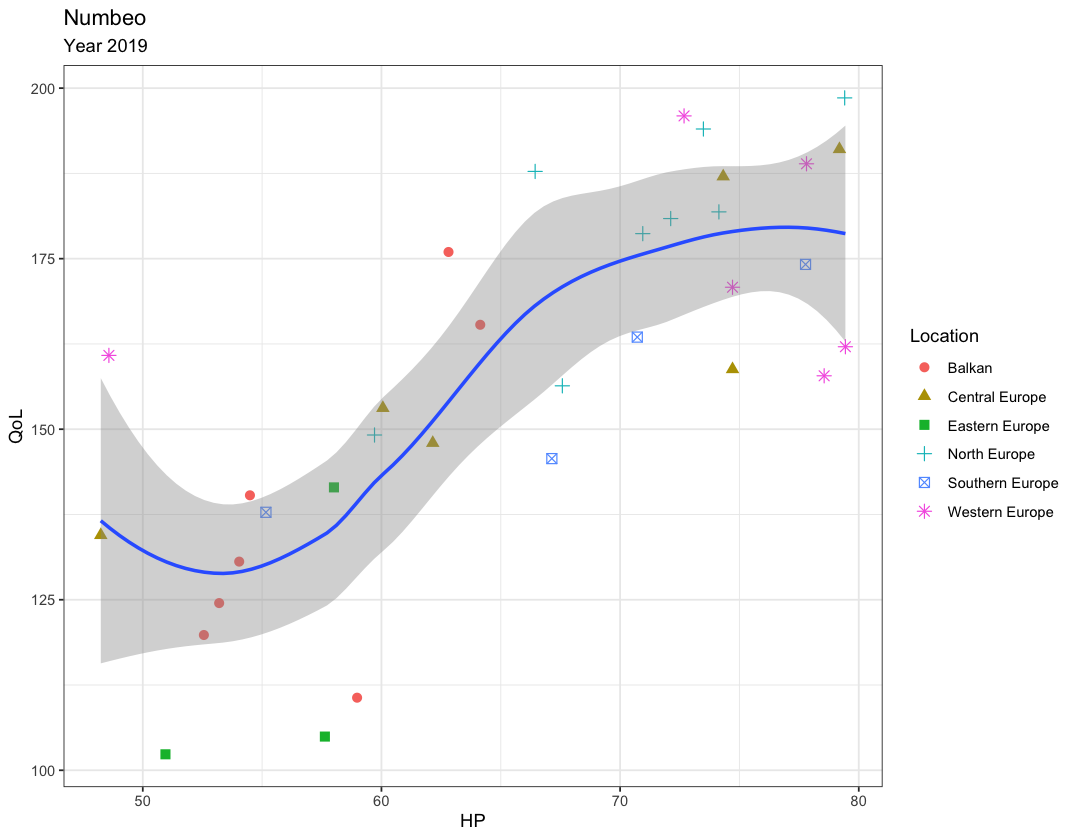

In [1090]:
options(repr.plot.width=9, repr.plot.height=7)

scplot_table %>% filter(Year == 2019) %>%#filter(Continent == "Europe") %>%

ggplot(aes(x=HP, y=QoL)) + 

  geom_point(aes(color = Location, shape = Location), size = 2.5) +

  geom_smooth() +

  labs(title = "Numbeo",
       subtitle = "Year 2019",
       color = "Location") +

  theme(#panel.grid.minor = element_line(colour = NA), panel.grid.minor = element_line(colour = NA),
               #panel.background = element_rect(fill = NA, colour = NA),
               axis.text.x = element_blank(),
               axis.text.y = element_blank(), 
               axis.ticks.x = element_blank(),
               axis.ticks.y = element_blank(), axis.title = element_blank(),
               #rect = element_blank(),
               plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines")) +

  guides(size=FALSE) +

  theme_bw()

## Healthcare from wikipedia

In [1010]:
link <- paste0("https://en.wikipedia.org/wiki/Euro_Health_Consumer_Index")
webpage <- read_html(link)
data <- html_nodes(webpage,".wikitable")
table <- html_table(data[[1]], header = FALSE)

In [1021]:
wiki_healthcare <- 
    table[-1,] %>% 
    rename("Country" = "X1", "Rank" = "X2", "Score" = "X3", "PatientRights" = "X4",
           "WaitingLines" = "X5", "OutcomesScore" = "X6", "Reach" = "X7", 
           "Prevention" = "X8", "Pharma" = "X9") %>%
    mutate(Rank = as.numeric(Rank), Score = as.numeric(Score), PatientRights = as.numeric(PatientRights),
           WaitingLines = as.numeric(WaitingLines), OutcomesScore = as.numeric(OutcomesScore), 
           Reach = as.numeric(Reach), Prevention = as.numeric(Prevention), Pharma = as.numeric(Pharma)) %>%
    mutate("Location" = ifelse(Country %in% nEurope, "North Europe", 
                        ifelse(Country %in% sEurope, "Southern Europe", 
                        ifelse(Country %in% eEurope, "Eastern Europe", 
                        ifelse(Country %in% wEurope, "Western Europe", 
                        ifelse(Country %in% seEurope, "Balkan", 
                        ifelse(Country %in% cEurope, "Central Europe", "other")))))))

wiki_healthcare %>% head(3)

Country     Rank Score PatientRights WaitingLines OutcomesScore Reach
1 Switzerland 1    893   113           225          278            99  
2 Netherlands 2    883   125           175          256           125  
3 Norway      3    857   125           138          278           120  
  Prevention Pharma Location      
1  95        83     Western Europe
2 113        89     Western Europe
3 119        78     North Europe

In [1037]:
numbeo_healthcare <- 
    qol_data_europe %>% 
    filter(Year == 2018) %>% 
    select(Country, HP) %>%
    arrange(-HP) %>% 
    mutate("Location" = ifelse(Country %in% nEurope, "North Europe", 
                        ifelse(Country %in% sEurope, "Southern Europe", 
                        ifelse(Country %in% eEurope, "Eastern Europe", 
                        ifelse(Country %in% wEurope, "Western Europe", 
                        ifelse(Country %in% seEurope, "Balkan", 
                        ifelse(Country %in% cEurope, "Central Europe", "other")))))))

numbeo_healthcare %>% head(3)

Country     HP    Location      
1 Netherlands 81.08 Western Europe
2 Belgium     80.43 Western Europe
3 Austria     78.80 Central Europe

#### Testing accuracy first

#### Scatterplot with only certain points labeled

In [1065]:
wiki_hp_reduced <- wiki_healthcare %>% select(Country, Score)

combined_hp <- merge(x = wiki_hp_reduced, y = numbeo_healthcare, by = "Country", all = TRUE) %>% 
               filter(Location != "NA") %>% filter(Score != "NA")

# Normalise the data by dividing with the mean of the column
combined_norm <-
    combined_hp %>% 
    mutate("wiki_norm" = Score / mean(combined_hp$Score),
           "numbeo_norm" = HP / mean(combined_hp$HP))

In [1073]:
# Let's extract the outliers

outliers <- combined_norm %>%
    mutate("diff" = abs(wiki_norm-numbeo_norm)**2) %>% 
    arrange(-diff) %>% 
    filter(diff >= 0.01) %>% 
    distinct(Country)

outliers_countries <- c(outliers$Country)
outliers_countries

[1] "Spain"       "Serbia"      "Switzerland" "Ireland"     "Lithuania"  
[6] "Poland"

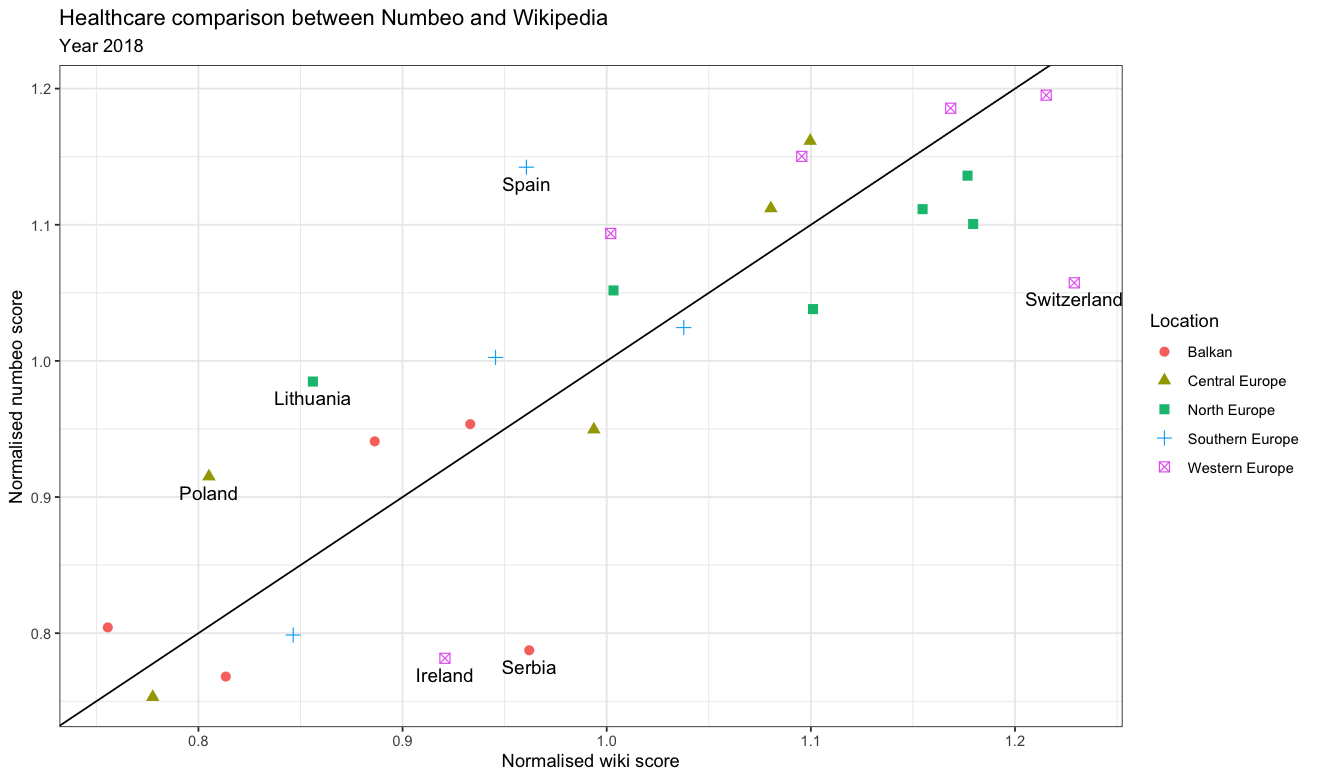

In [1091]:
options(repr.plot.width=11, repr.plot.height=6.5)

combined_norm %>% mutate(outliers = ifelse(Country %in% outliers_countries, Country, "")) %>%

ggplot(aes(x=wiki_norm, y=numbeo_norm)) + 

geom_point(aes(color = Location, shape = Location), size = 2.5) +

geom_abline(intercept = 0, slope = 1) +

  labs(title = "Healthcare comparison between Numbeo and Wikipedia",
       subtitle = "Year 2018",
       color = "Location",
       x = "Normalised wiki score", 
       y = "Normalised numbeo score") +

  guides(size=FALSE) +
  
  geom_text(aes(x = wiki_norm, y = numbeo_norm, label = outliers), size = 4, hjust = 0.5, vjust = 1.7) +

  theme_bw()